# Projet 5 - Produisez une étude de marché

## Partie I - Importation des données

### Importation des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import P5_03_OCR5 as OCR

from scipy.cluster.hierarchy import linkage, fcluster, cophenet, dendrogram

from sklearn import preprocessing
from sklearn import decomposition

from scipy.spatial.distance import pdist

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

sns.set(color_codes = True)
#sns.set(style="whitegrid")

In [2]:
_FONTSIZE_ = 18
_FONTSIZETITLE_ = 24

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}

meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

### Importation des données nettoyés

In [3]:
data = pd.read_csv('./Export/data.csv', index_col = 0)

## Partie II - Réalisation du dendrogramme

### Préparation des données - Centrage et Réduction

In [4]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

__CLUSTER__ = 5

### Optimisation du dendrogramme

### Cophenetic correlation

Nous calculons les coefficients Cophenitiques pour chaque méthode de la fonction sklearn.linkage

In [5]:
OCR.coefCophenetic(X_scaled)

Single  Complete  Average  Weighted  Centroid  Median  \
Cophenetic Coefficient    0.61      0.67     0.73      0.64      0.74    0.62   

                        Ward  
Cophenetic Coefficient  0.61

Nous constatons que la méthode Average à la meilleure corélation entre les distances du DataFrame et les distances du dendrogramme.

### Courbe de Lorenz et coefficient de Gini

Nous calculons les coefficients de Gini pour chaque méthode de la fonction sklearn.linkage

In [6]:
OCR.coefGini(X_scaled)

Single  Complete   Average  Weighted  Centroid    Median  \
Gini Coefficient  0.219436  0.369594  0.305584  0.312177  0.291031  0.283927   

                      Ward  
Gini Coefficient  0.484601

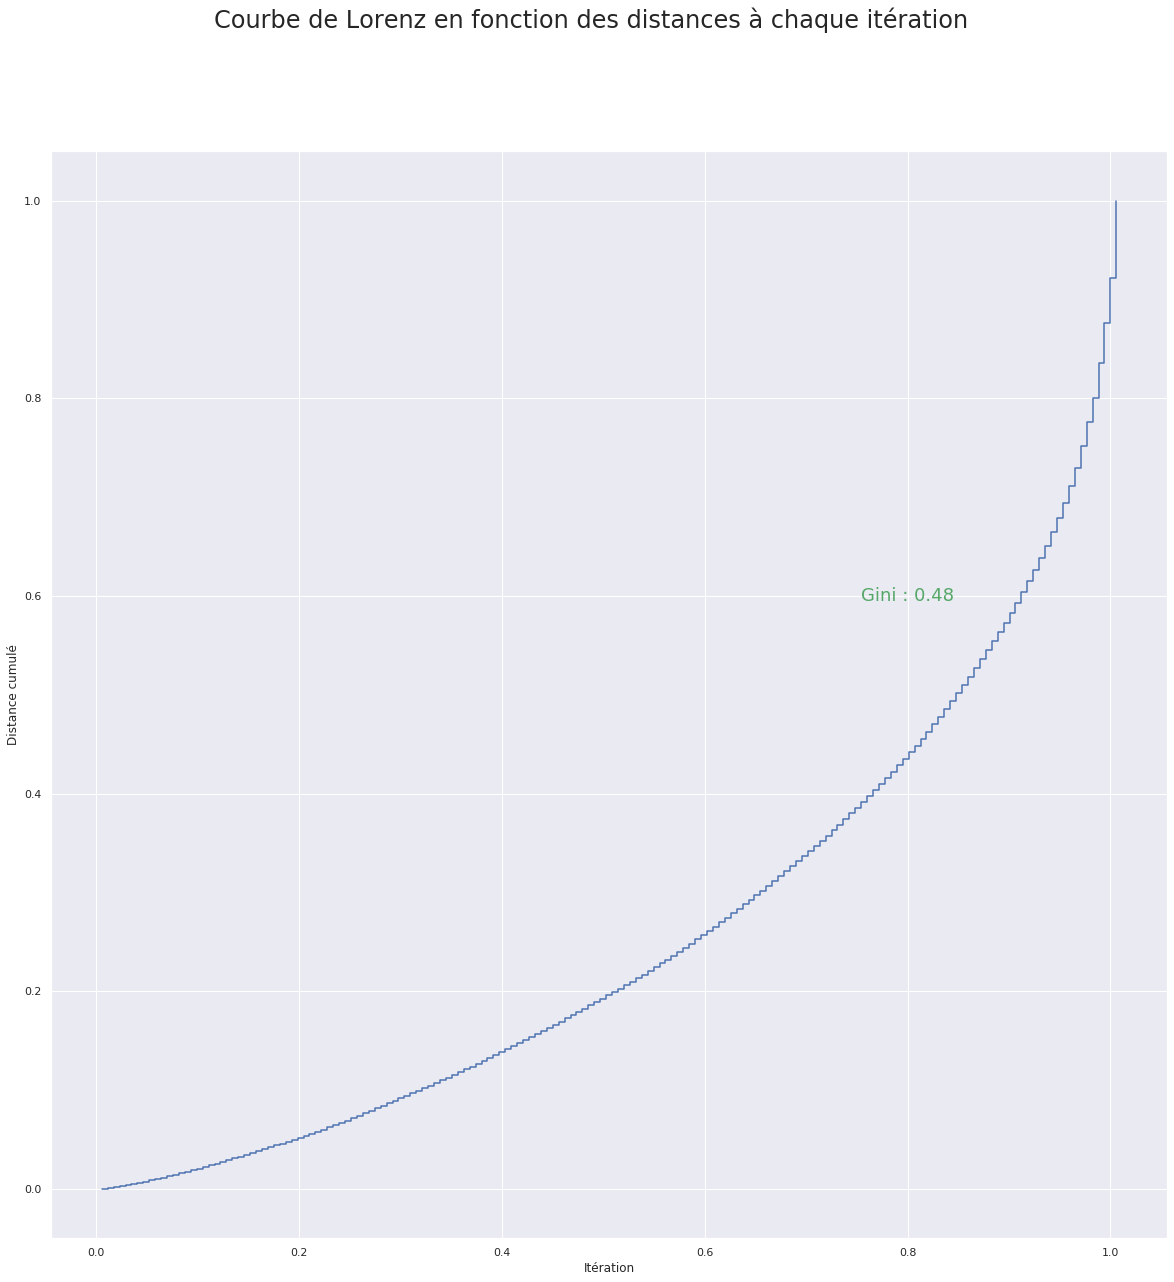

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))

fig.suptitle("Courbe de Lorenz en fonction des distances à chaque itération", fontsize= _FONTSIZETITLE_)

Z = linkage(X_scaled, 'ward')
lorenz, n, gini = OCR.lorenz(pd.DataFrame(data=Z[:,2]))
xaxis = np.linspace(1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

axes.plot(xaxis,lorenz,drawstyle='steps-post')
axes.text(0.8, 0.6, f"Gini : {gini:0.2f}", {'color': 'C2', 'fontsize': 18}, va="center", ha="center")
axes.set_xlabel('Itération')
axes.set_ylabel('Distance cumulé')

plt.show()

### Coefficient de Silhouette

In [8]:
methods = ['Single', 'Complete', 'Average', 'Weighted', 'Centroid', 'Median', 'Ward']
scoreSilhouetteMethod = []

for method in methods:
    Z = linkage(X_scaled, method.lower())
    scoreSilhouette = []
    for cluster in range(2, 11):
        clusters = fcluster(Z, cluster, criterion='maxclust')
        if len(set(clusters)) > 1:
            scoreSilhouette.append(silhouette_score(X_scaled, clusters))
        else:
            scoreSilhouette.append(0)
    
    scoreSilhouetteMethod.append(scoreSilhouette)

silhouette = pd.DataFrame(scoreSilhouetteMethod, index=methods, columns=range(2,11))

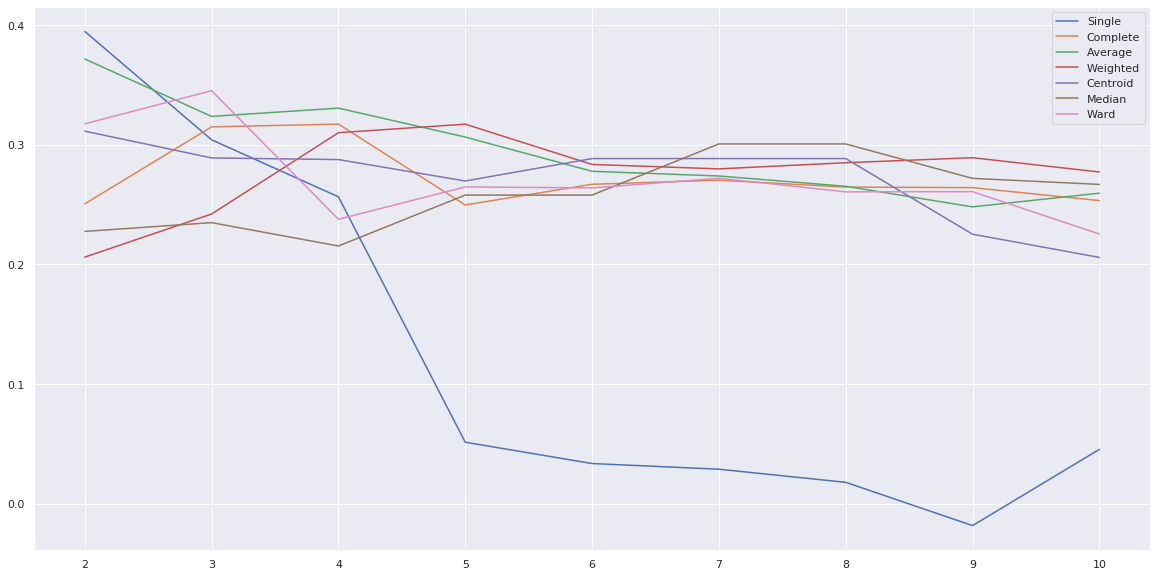

In [9]:
fig = plt.figure(figsize=(20,10))

for i in range(0,7):
    sns.lineplot(y=silhouette.iloc[i, :].values, x=silhouette.iloc[i, :].index, label=methods[i])

In [10]:
silhouette

2         3         4         5         6         7  \
Single    0.394825  0.304198  0.256530  0.051366  0.033542  0.028809   
Complete  0.250688  0.315022  0.317312  0.249714  0.267022  0.270455   
Average   0.371774  0.323736  0.330697  0.306481  0.277883  0.273935   
Weighted  0.206135  0.242170  0.310137  0.317267  0.283598  0.279903   
Centroid  0.311427  0.289042  0.287675  0.269764  0.288524  0.288524   
Median    0.227596  0.234950  0.215426  0.257990  0.257990  0.300739   
Ward      0.317535  0.345291  0.237754  0.264802  0.263984  0.272034   

                 8         9        10  
Single    0.017836 -0.018339  0.045364  
Complete  0.264676  0.264208  0.253370  
Average   0.265350  0.248130  0.259579  
Weighted  0.285032  0.289236  0.277283  
Centroid  0.288524  0.225280  0.205891  
Median    0.300739  0.271961  0.266907  
Ward      0.260688  0.260866  0.225451

Nous constatons que les données, au delà de 2 clusters, commence à presenter une superposition des clusters de plus en plus importantes. Pour la méthode centroide, nous obtenons un meilleur résultat pour 3 clusters uniquement du fait que pour la division en deux clusters, un seul cluster est selectionné.

## Partie III - Analyse exploratoire

Nous allons faire une analyse exploratoire des 4 variables en fonction des 5 clusters sélectionnés afin de determiner et d'analyser les caractéristiques de selection des clusters

In [11]:
Z = linkage(X_scaled, 'ward')
clusters = fcluster(Z, __CLUSTER__, criterion='maxclust')

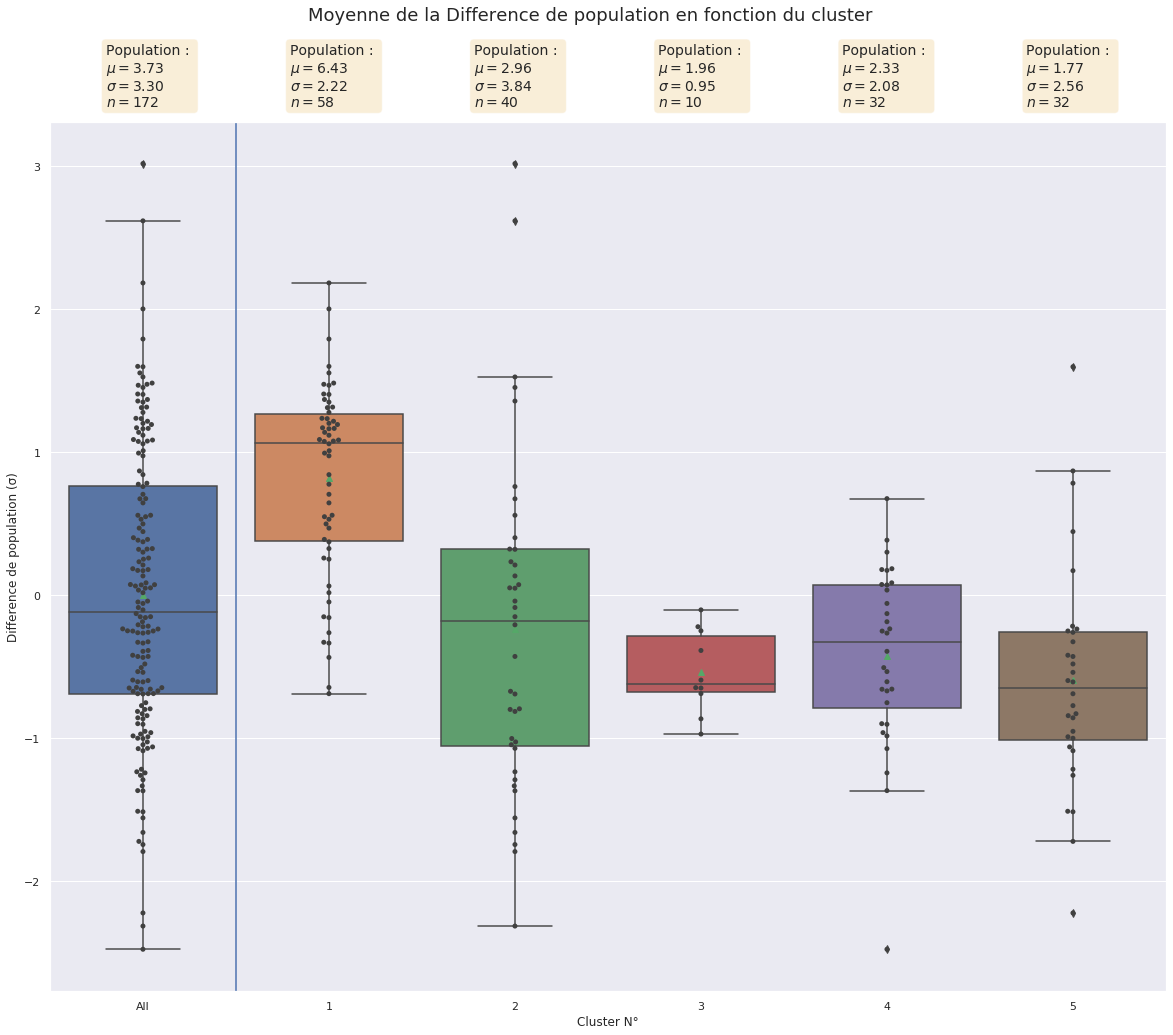

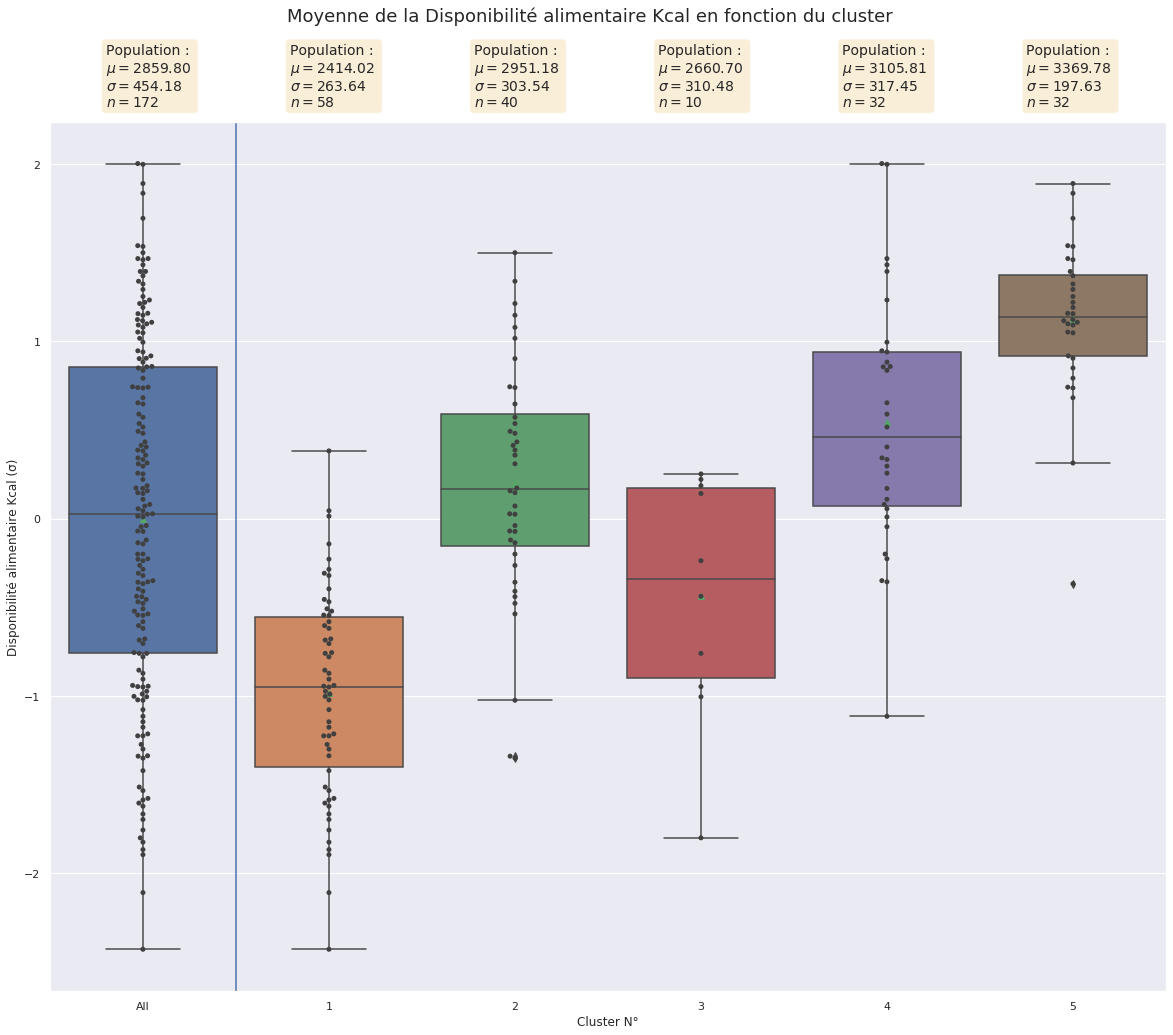

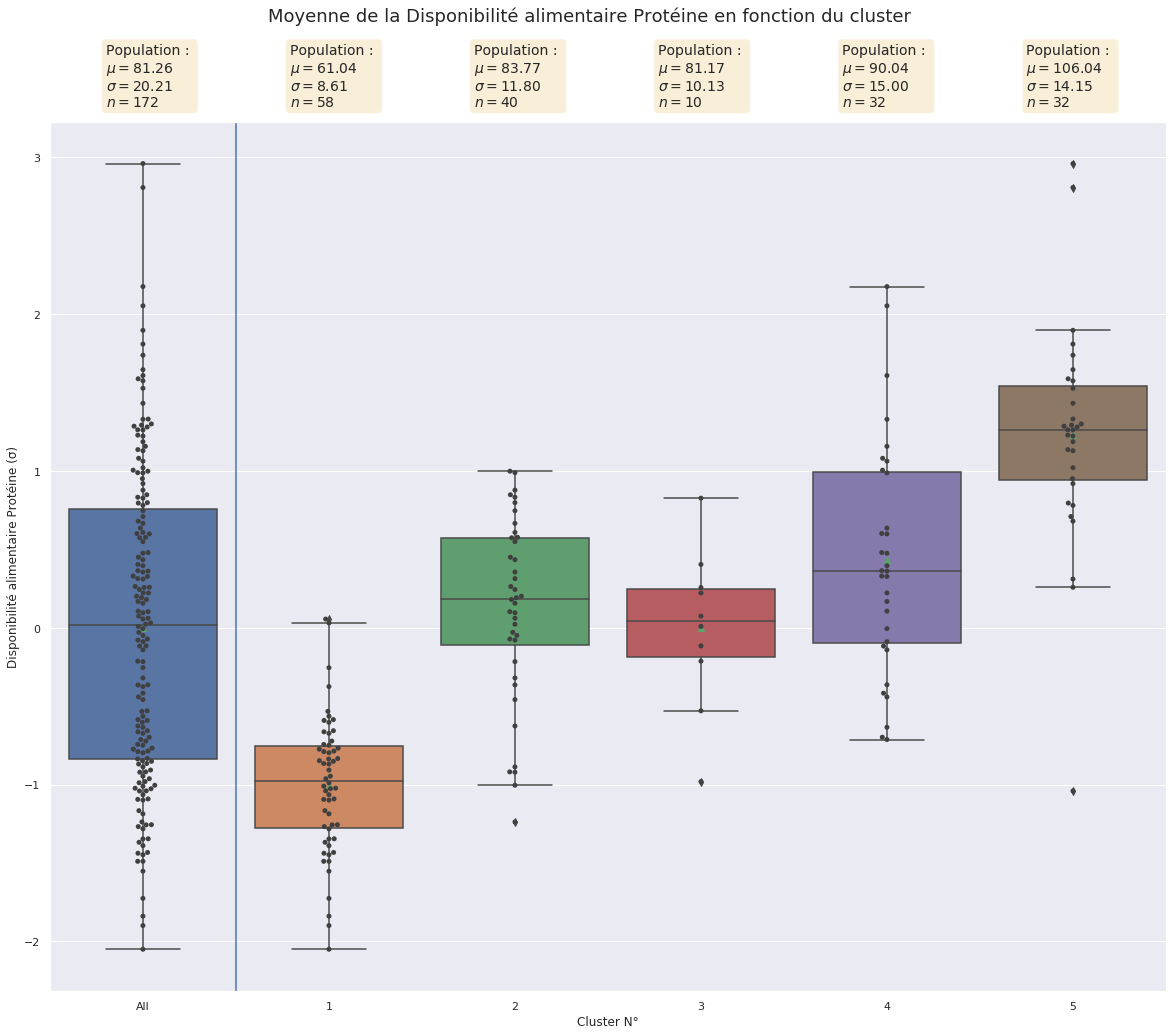

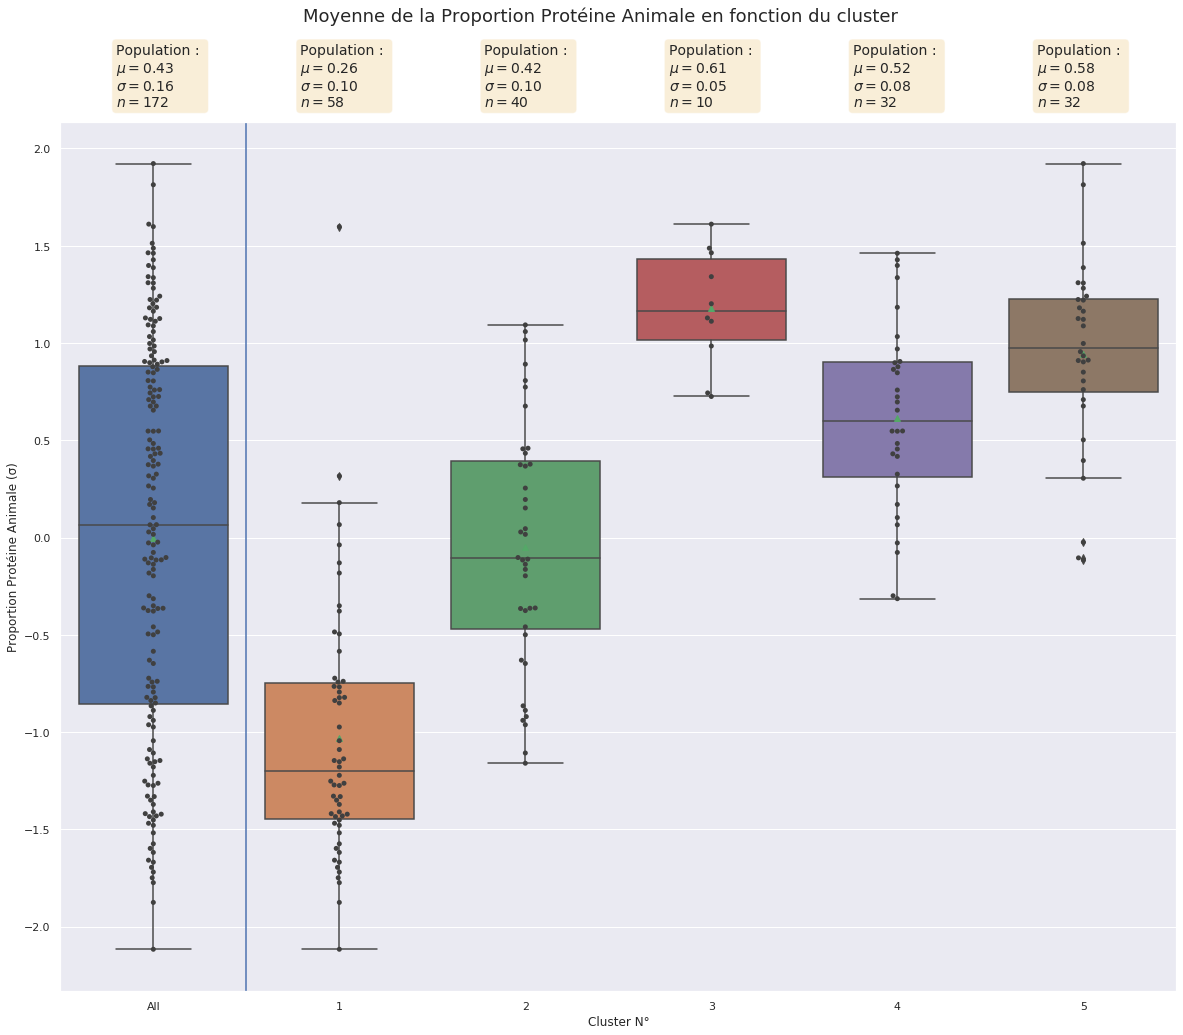

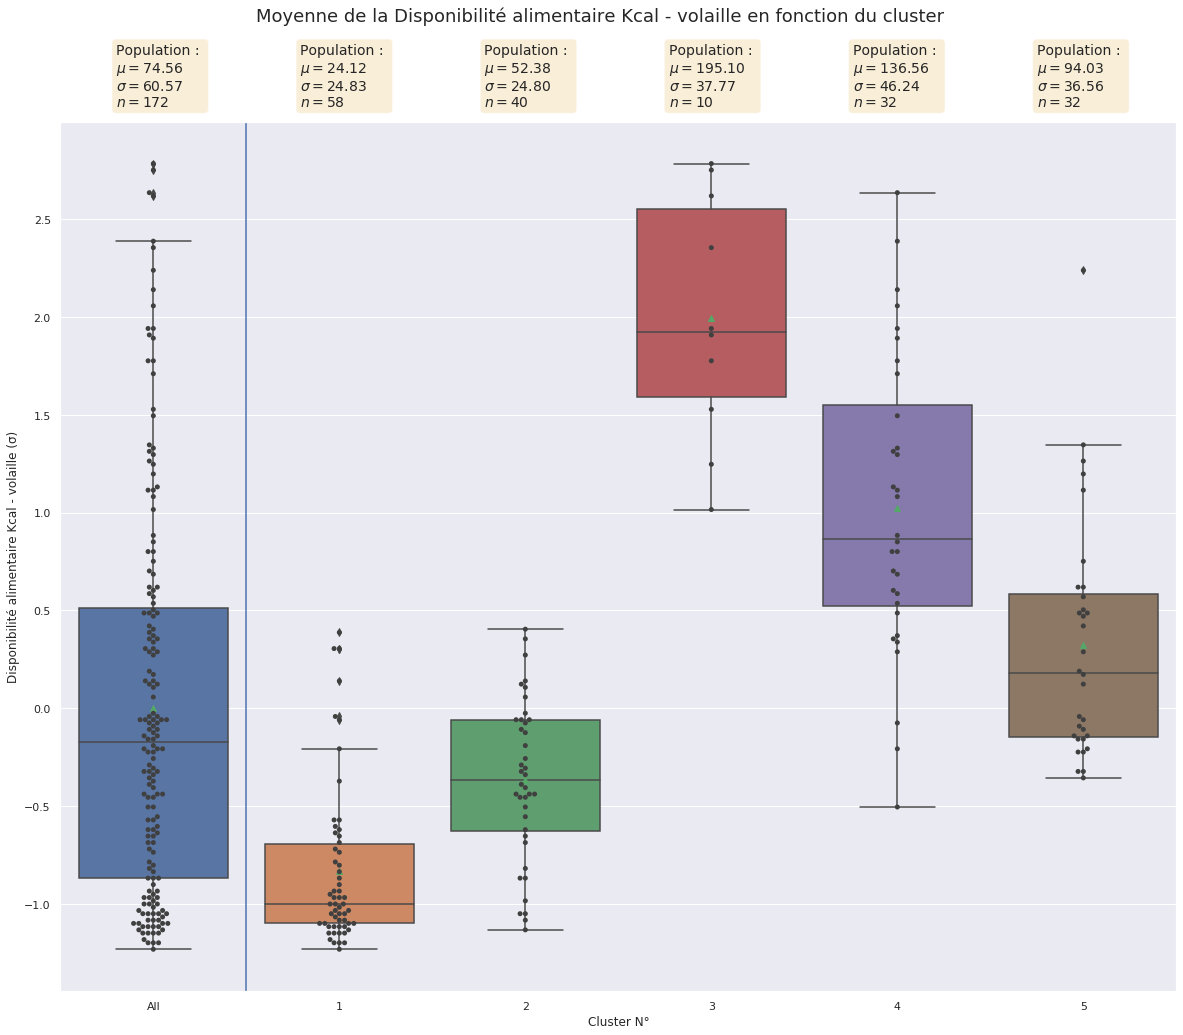

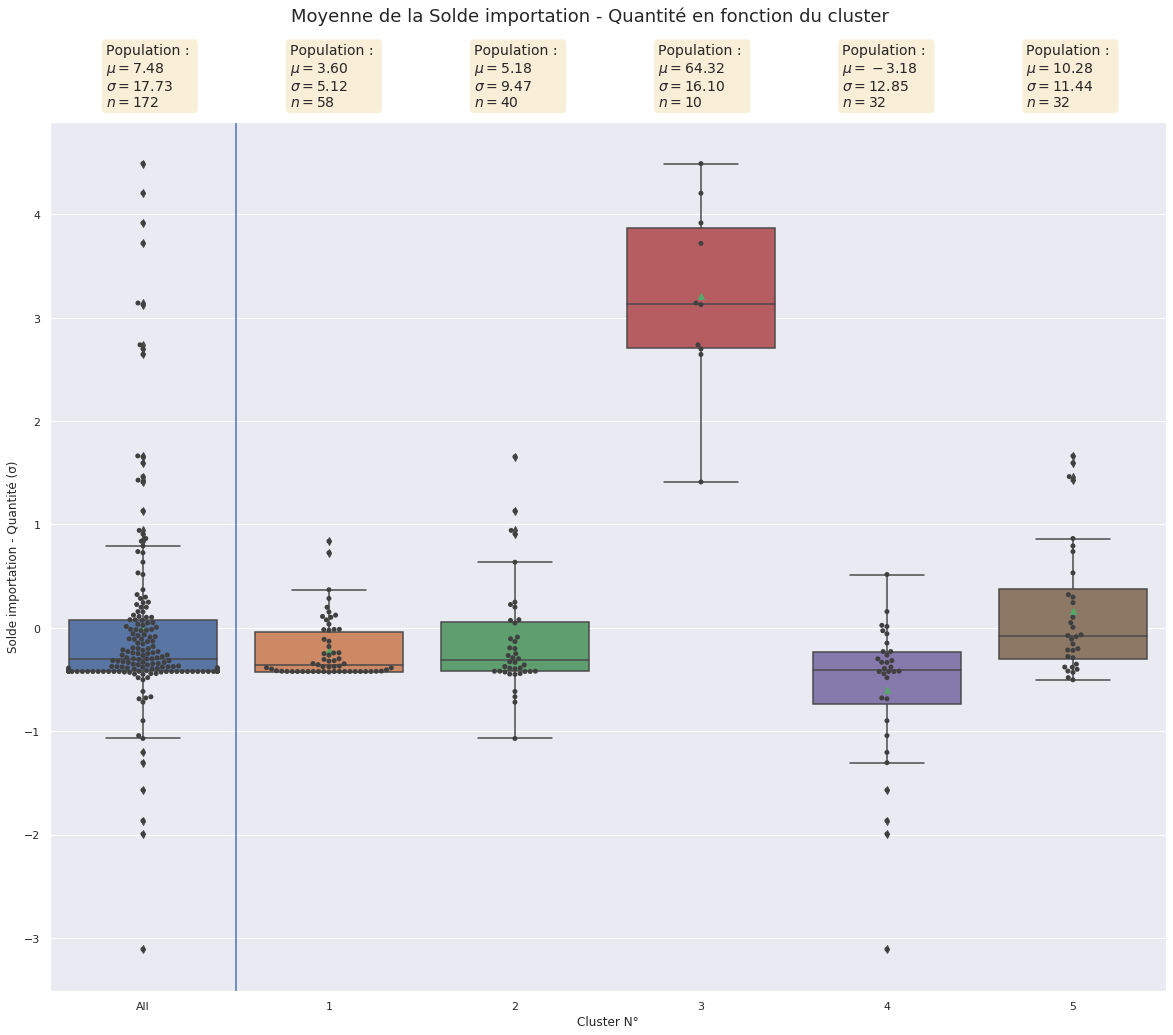

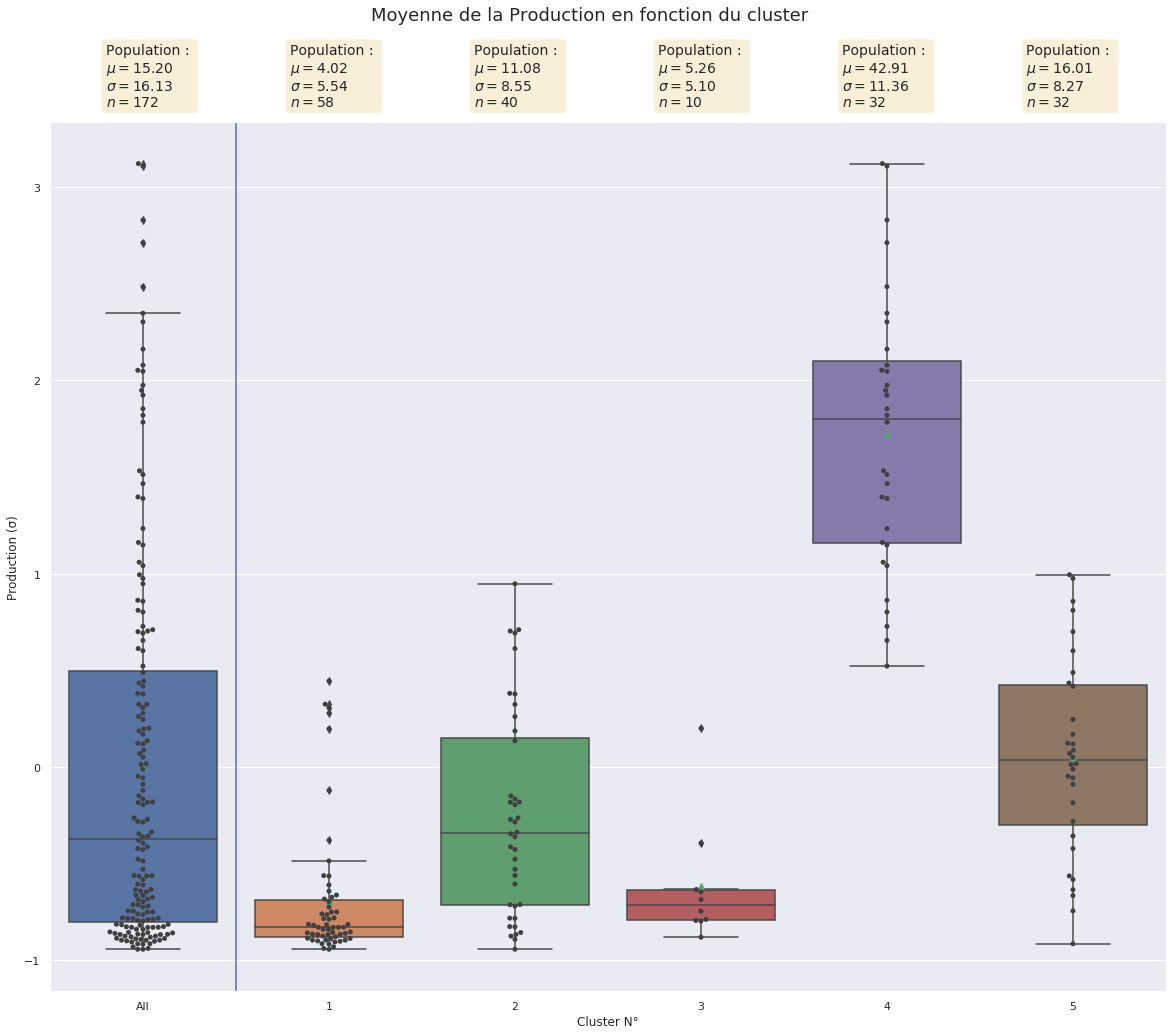

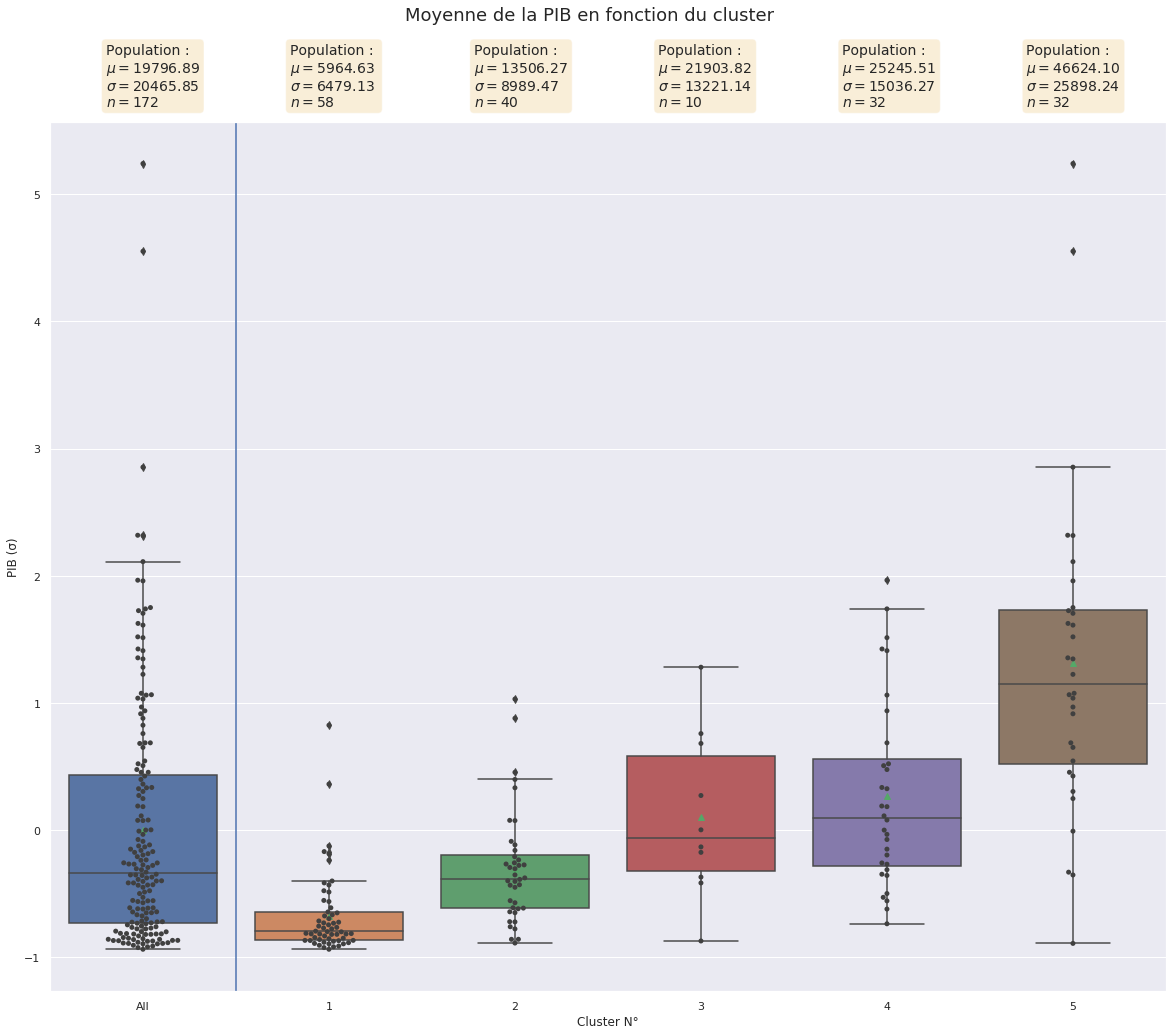

In [12]:
OCR.plotbox(data, clusters)

* La méthode **simple** constitue 1 cluster avec la quasi totalité des individus, un cluster avec 2 individus et 3 clusters avec chaque 1 individu.
* La méthode **complete** constitue 3 clusters avec plus de 10 individues et 2 clusters avec moins de 10 individus.
* La méthode **average** ne forme que deux clusters conséquents, 1 clusters de 10 individus et 2 clusters contenant des individus uniques.
* La méthode **weighted** ne forme que deux clusters conséquents, 1 clusters de 22 individus, 1 clusters de 10 et 1 clusters contenant que 2 individus.
* La méthode **centroid** constitue 1 cluster avec la quasi totalité des individus, un cluster avec 9 individu, un cluster avec 2 individus et 2 clusters avec chaque 1 individu.
* La méthode **median** constitue 1 cluster avec la quasi totalité des individus et 4 clusters avec moins de 10 individus.
* La méthode **ward** constitue 4 clusters avec plus de 10 individues et 1 cluster avec moins de 10 individus.

Nous choississons la méthode ward qui donne un partage en clusters le plus équilibré

### Caractérisation des variables par paires

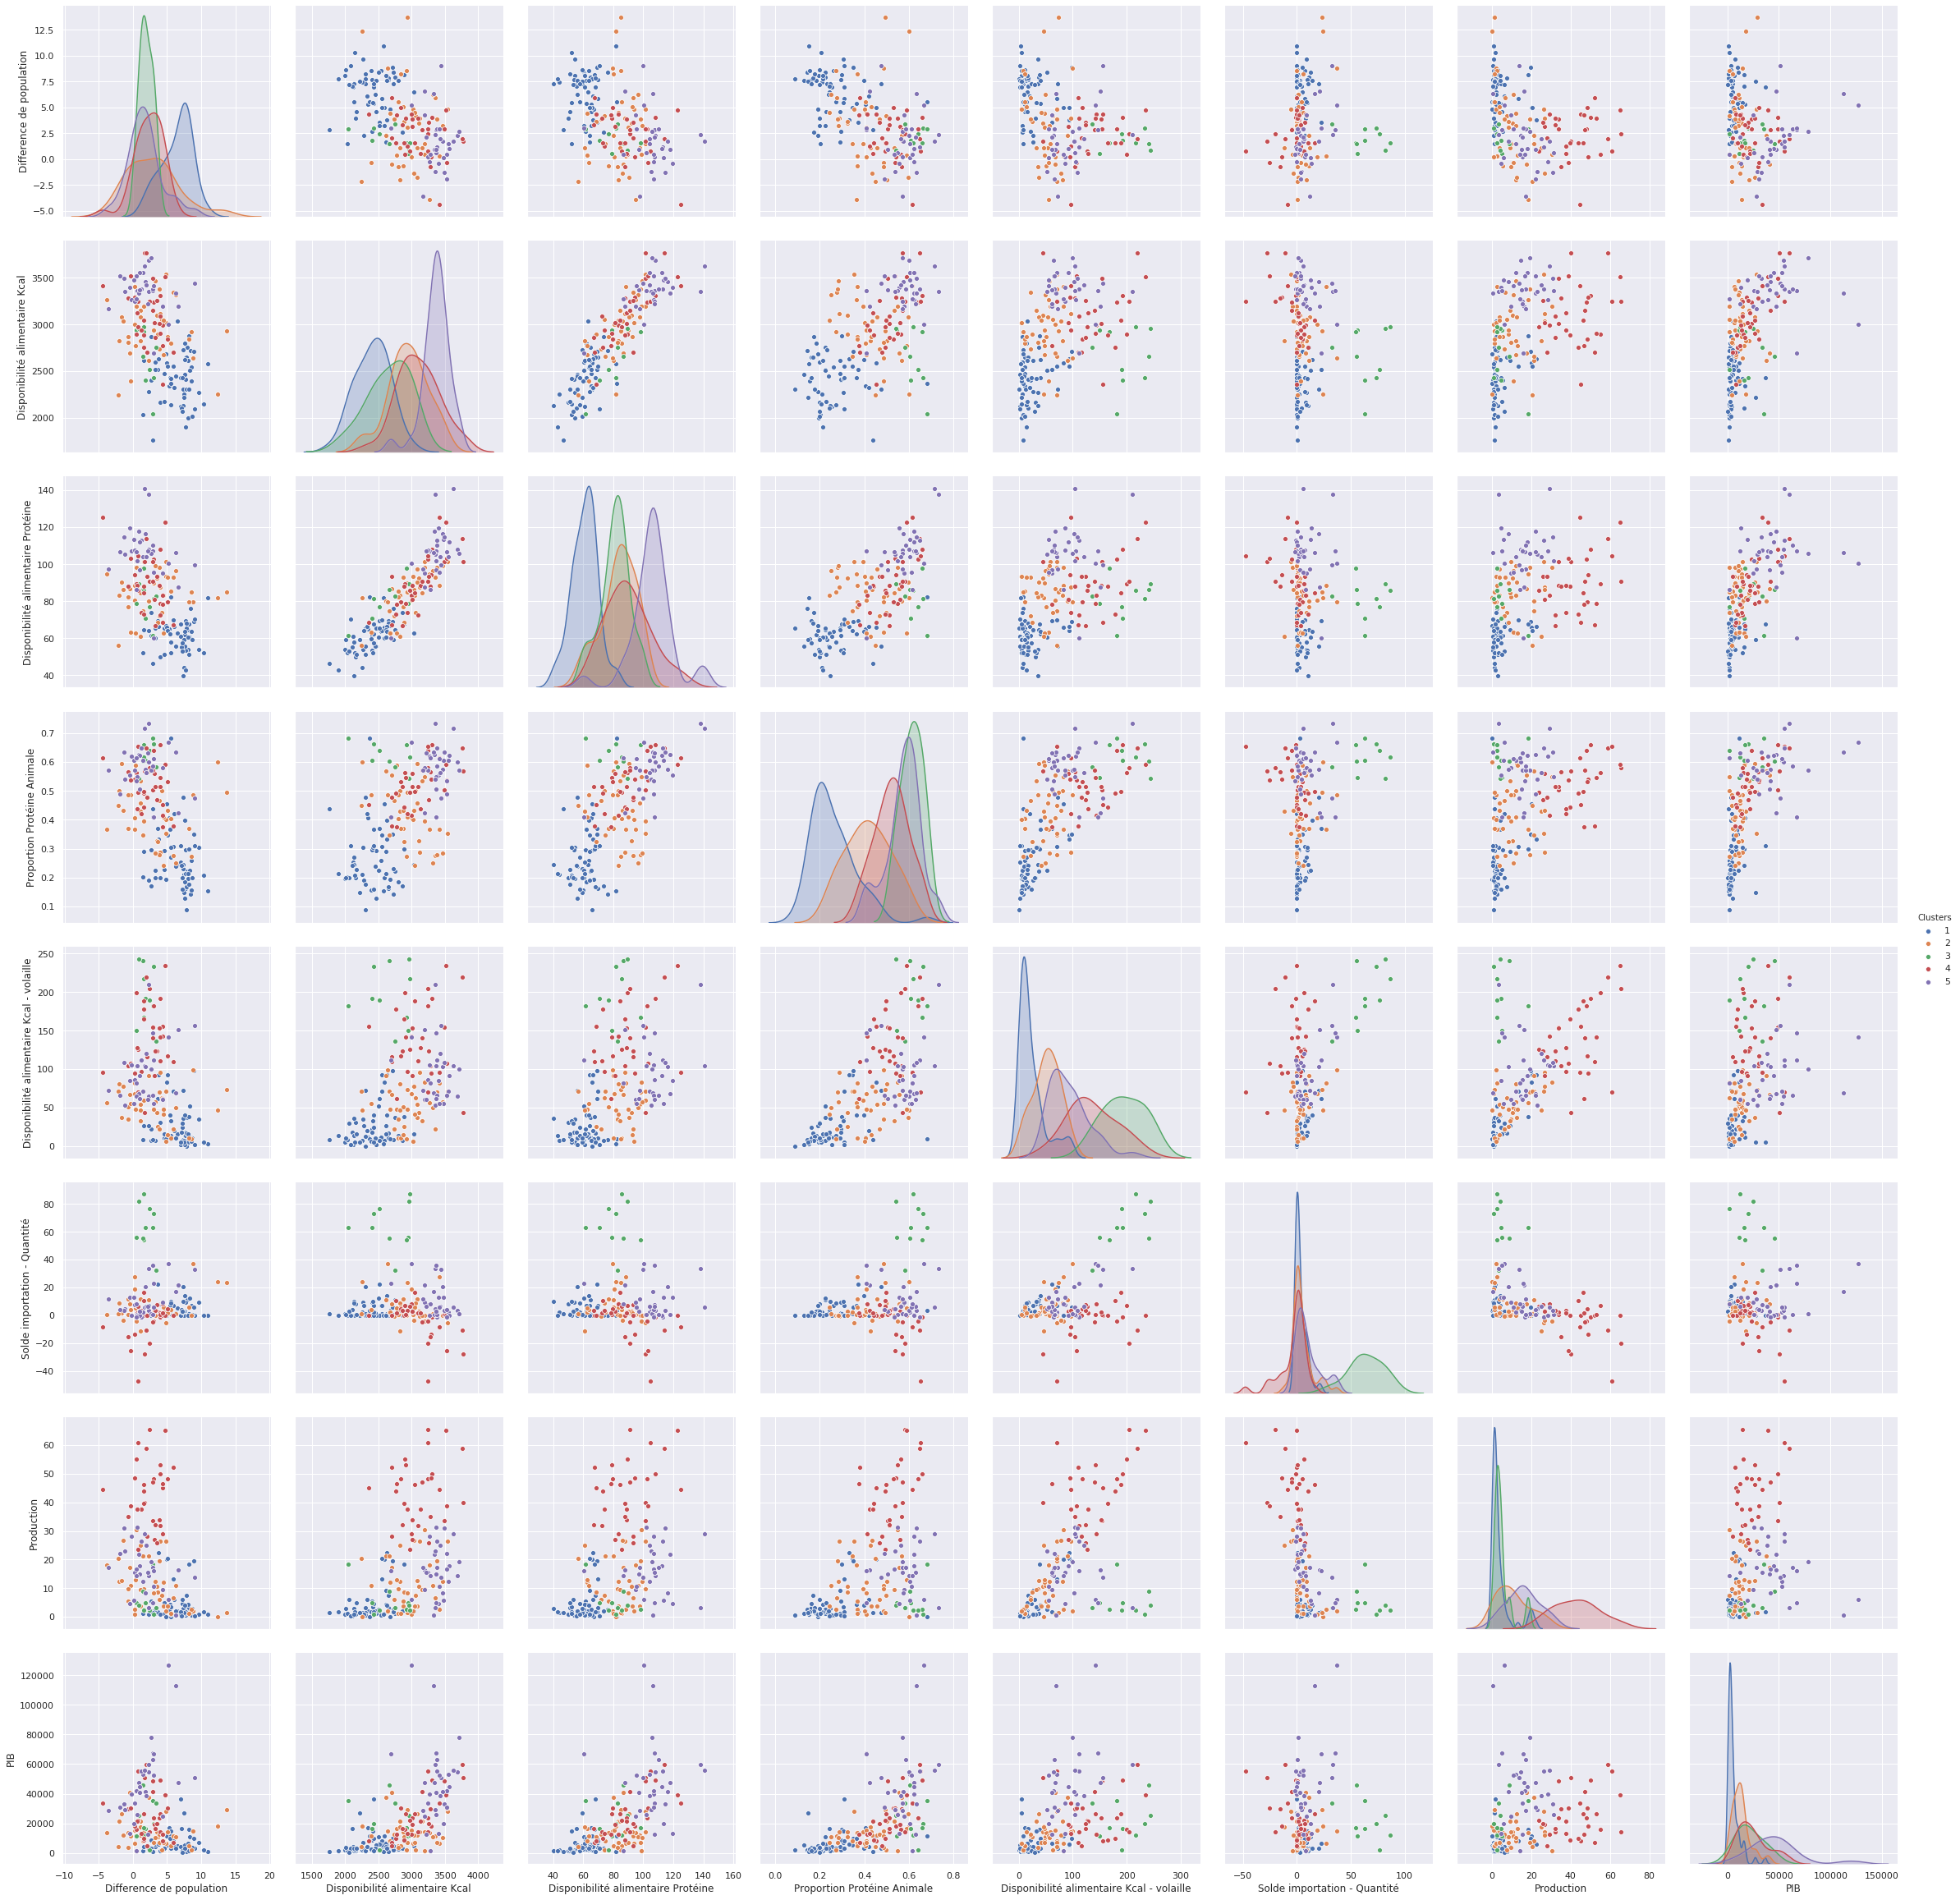

In [13]:
df = pd.DataFrame(data=X)
df.columns =  ['Difference de population', 'Disponibilité alimentaire Kcal', 'Disponibilité alimentaire Protéine', 'Proportion Protéine Animale', 'Disponibilité alimentaire Kcal - volaille', 'Solde importation - Quantité', 'Production', 'PIB']
df['Clusters'] = fcluster(Z, __CLUSTER__, criterion='maxclust')
sns.pairplot(df, hue='Clusters', height=4)

plt.savefig('Images/carac_paires.png')

### Dendrogramme

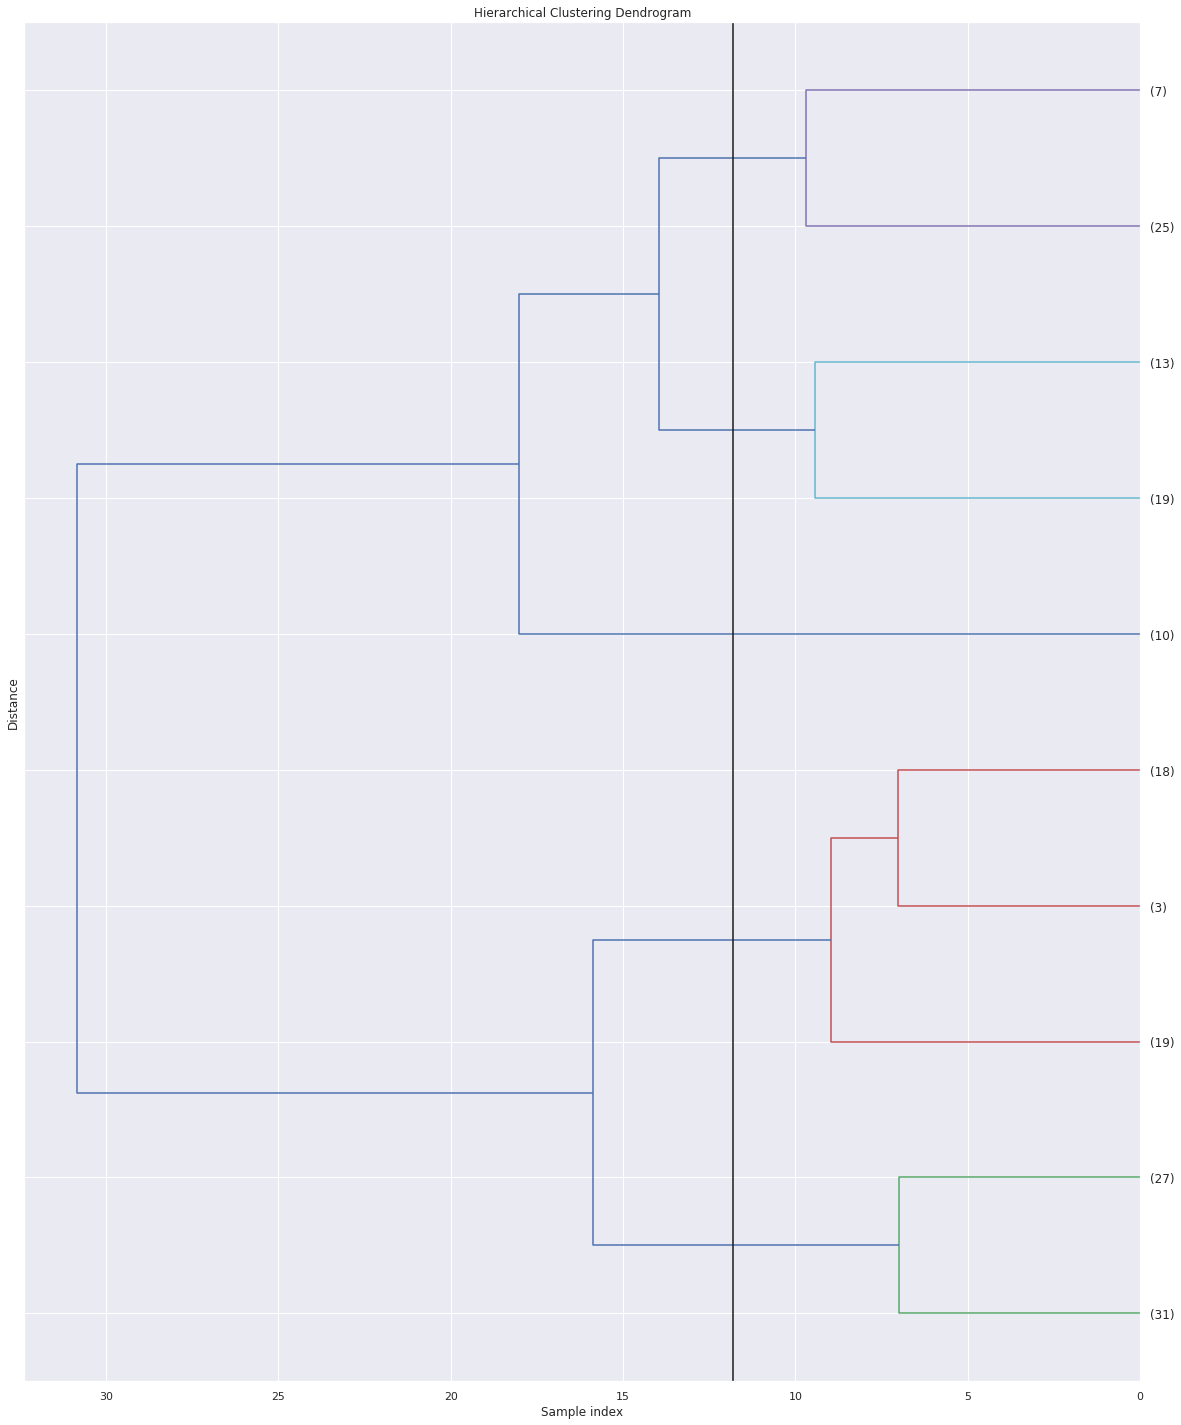

In [14]:
# Affichage du dendrogramme tronqué

x = Z[-__CLUSTER__][2] + (Z[-__CLUSTER__+1][2] - Z[-__CLUSTER__][2]) / 2

plt.figure(figsize=(20,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axvline(x, c='k')
dendrogram(
    Z,
    labels = names,
    orientation = "left",
    color_threshold = x,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10
)
plt.show()

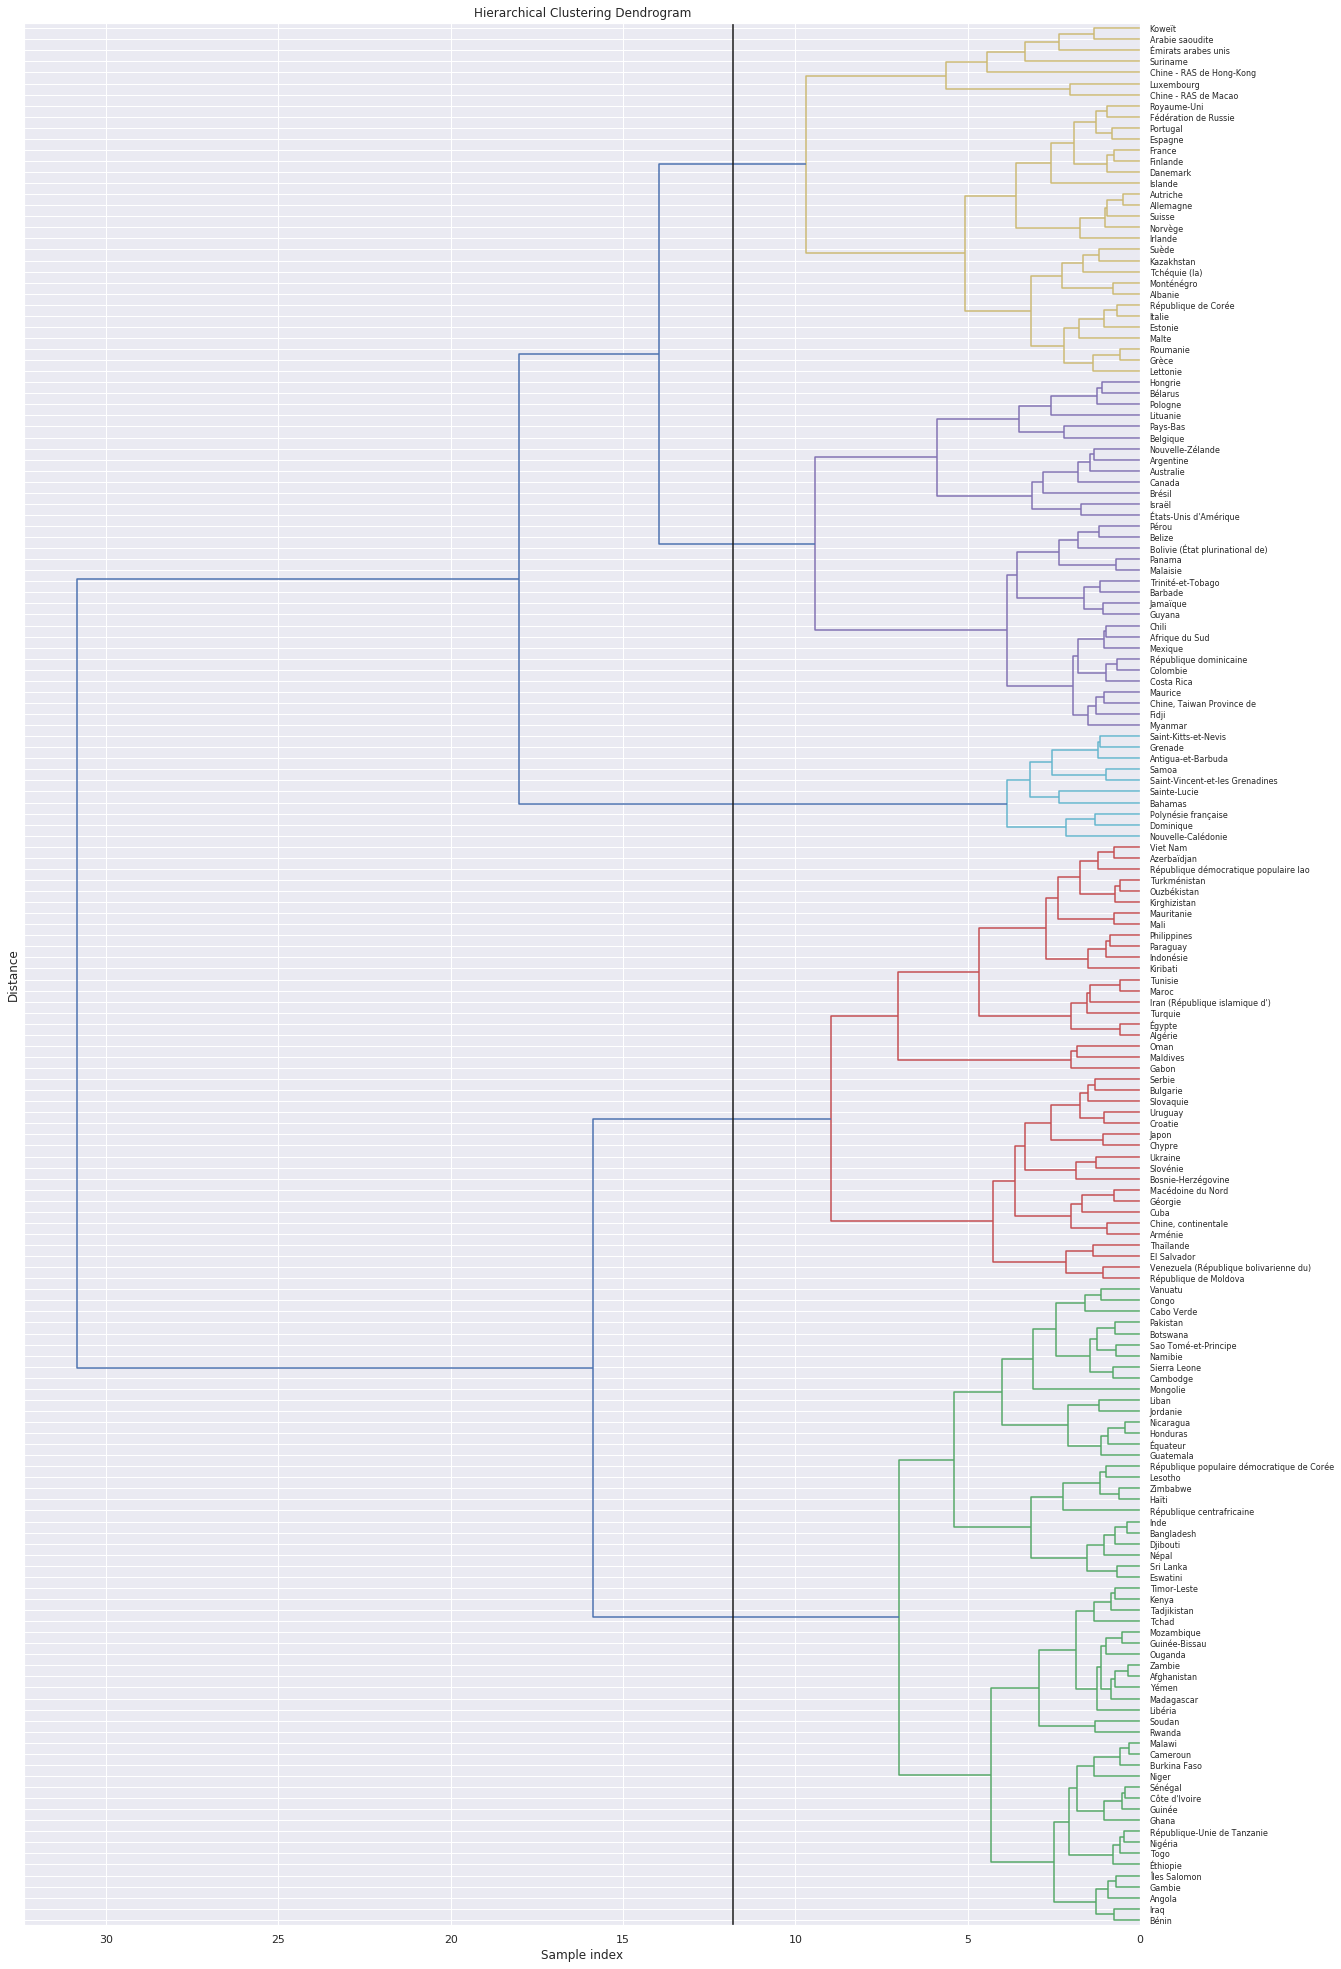

<Figure size 432x288 with 0 Axes>

In [15]:
# Affichage du dendrogramme complet

x = Z[-__CLUSTER__][2] + (Z[-__CLUSTER__+1][2] - Z[-__CLUSTER__][2]) / 2

plt.figure(figsize=(20,35))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axvline(x, c='k')
dendrogram(
    Z,
    labels = data.index,
    orientation = "left",
    color_threshold = x,
    leaf_font_size = 8
)
plt.show()

plt.savefig('Images/dendrogramme.png')

### Affichage et calcul de centroïde

In [16]:
data.groupby(clusters).mean()

Difference de population  Disponibilité alimentaire Kcal  \
1                  6.429673                     2414.017241   
2                  2.962741                     2951.175000   
3                  1.962696                     2660.700000   
4                  2.329047                     3105.812500   
5                  1.773754                     3369.781250   

   Disponibilité alimentaire Protéine  Proportion Protéine Animale  \
1                           61.040690                     0.262106   
2                           83.767000                     0.418987   
3                           81.175000                     0.614681   
4                           90.036875                     0.524589   
5                          106.040312                     0.577389   

   Disponibilité alimentaire Kcal - volaille  Solde importation - Quantité  \
1                                   24.12069                      3.604499   
2                                   52.37500                      5.181673   
3                                  195.10000                     64.321566   
4                                  136.56250                     -3.180991   
5                                   94.03125                     10.282444   

   Production           PIB  Clusters  
1    4.015469   5964.632809         1  
2   11.077755  13506.268219         2  
3    5.258476  21903.819791         3  
4   42.905233  25245.509839         4  
5   16.005833  46624.099948         5

### Choix des pays

Nous allons, tout d'abord, nous intéresser au PIB. en sélectionnant les clusters dont la médiane est proche au supérieure à la médiane de l'ensemble des pays. Nous sélectionnons, ainsi, les clusters 3, 4 et 5. Les moyennes des centroïdes sont supérieures à 20000$ / habitant

Ensuite, nous allons éliminer les exportateurs nettes de volailles, c'est à dire le cluster 4. Concernant la production, le cluster 4 est un gros producteur, ainsi que pour le 5. Mais le cluster 5 reste aussi un importateur de volaille.

Enfin, nous choississons les clusters ayant une disponibilité alimentaire élevées, et donc, susceptible de consommer. Les clusters 2, 3, 4 et 5 correspondent à cette description. Les moyennes des centroïdes sont supérieures ou proche de 2500 Kcal / habitant / jour

Suite à ces critères, les clusters 3 et 5 sont les plus susceptibles de contenir des pays ayant un marché pour l'importation de poulet.

### Comparaison d'une variable entre deux groupes de pays

## Partie III - Choix d'une courte liste de pays

In [17]:
data_short = data[data['Clusters'].isin([3, 5])].copy()

### Préparation des données - Centrage et Réduction

In [18]:
# préparation des données pour le clustering
X = data_short.values
names = data_short.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### Analyse exploratoire

In [19]:
Z = linkage(X_scaled, 'ward')
clusters = fcluster(Z, __CLUSTER__, criterion='maxclust')

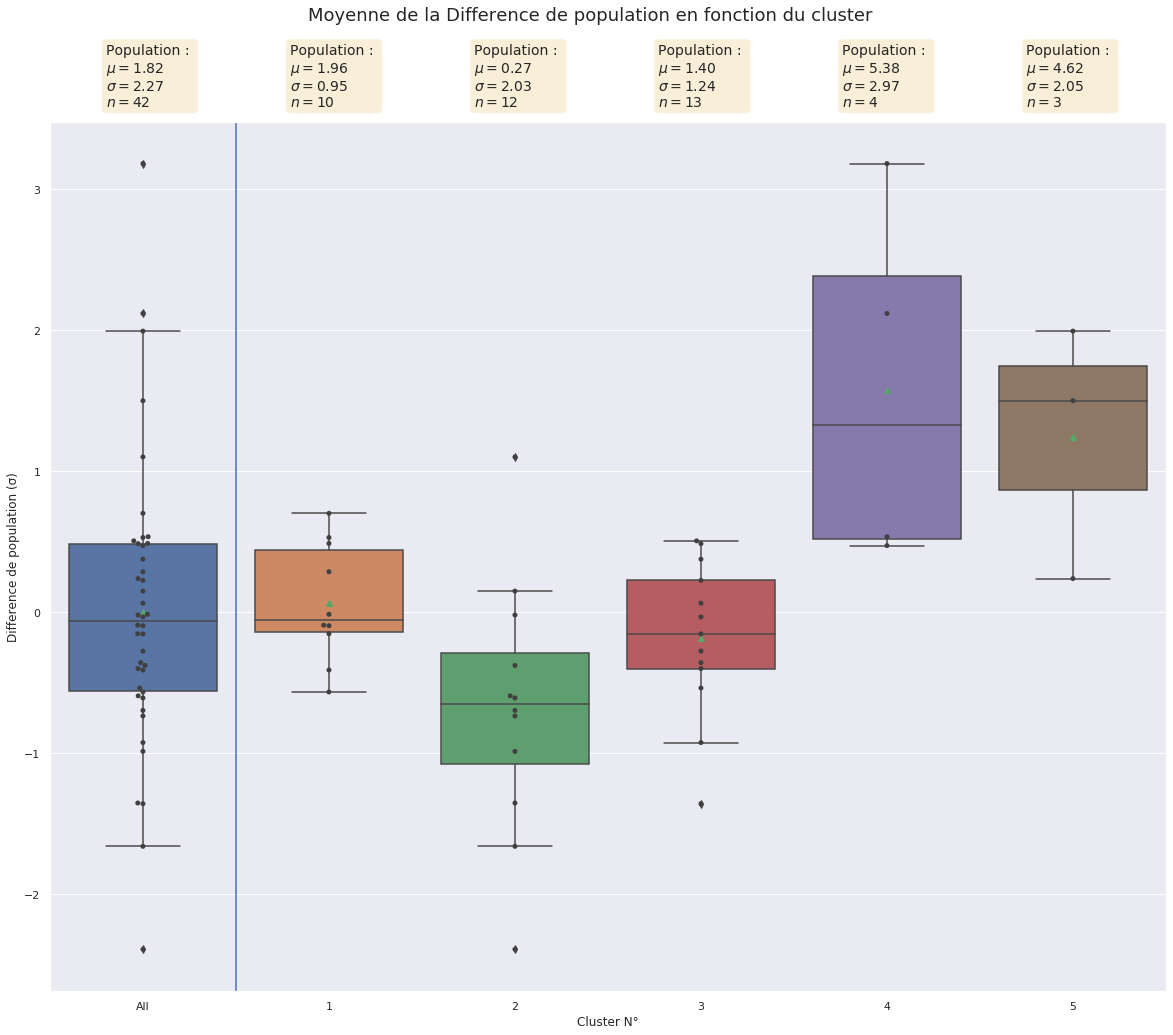

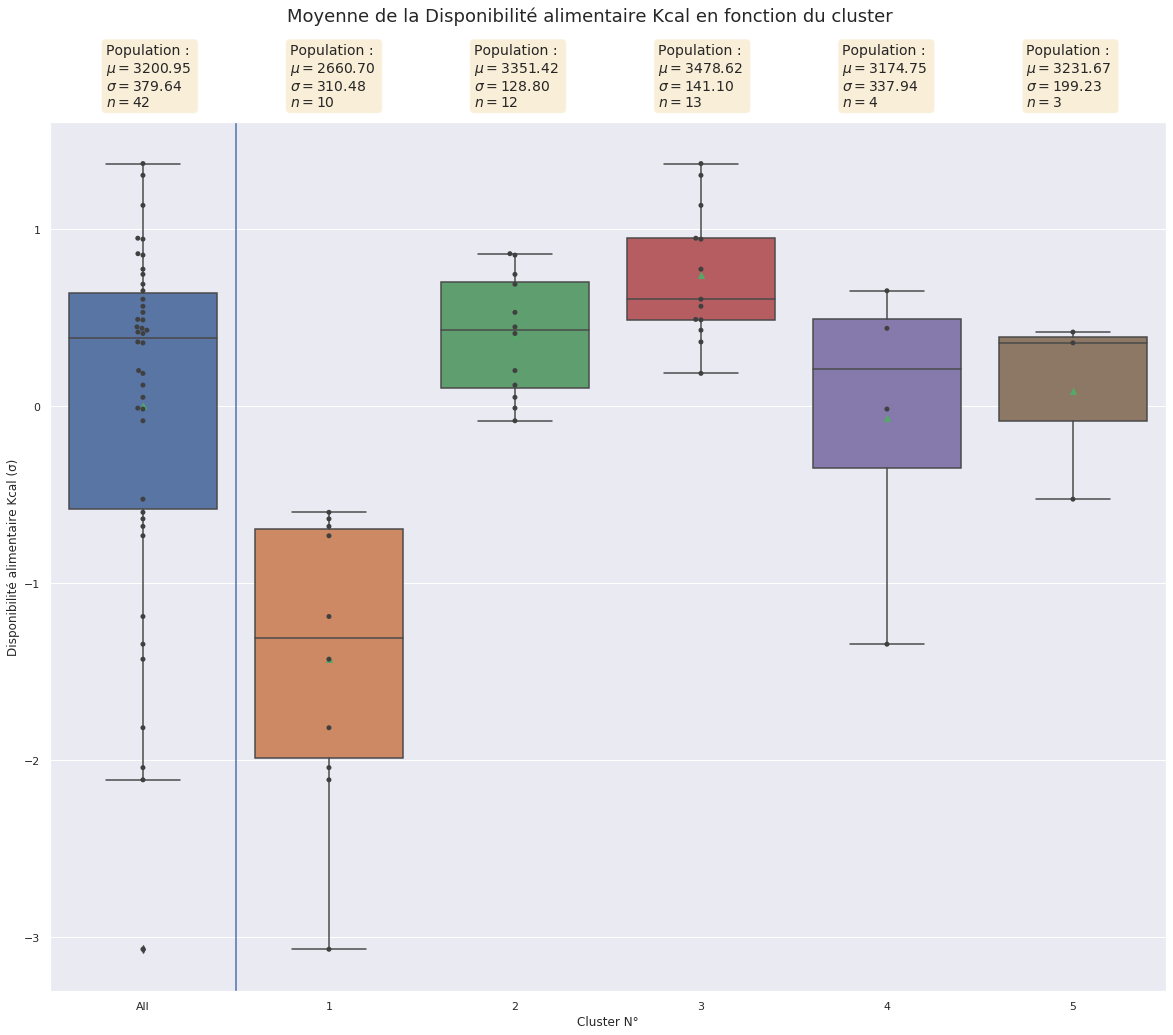

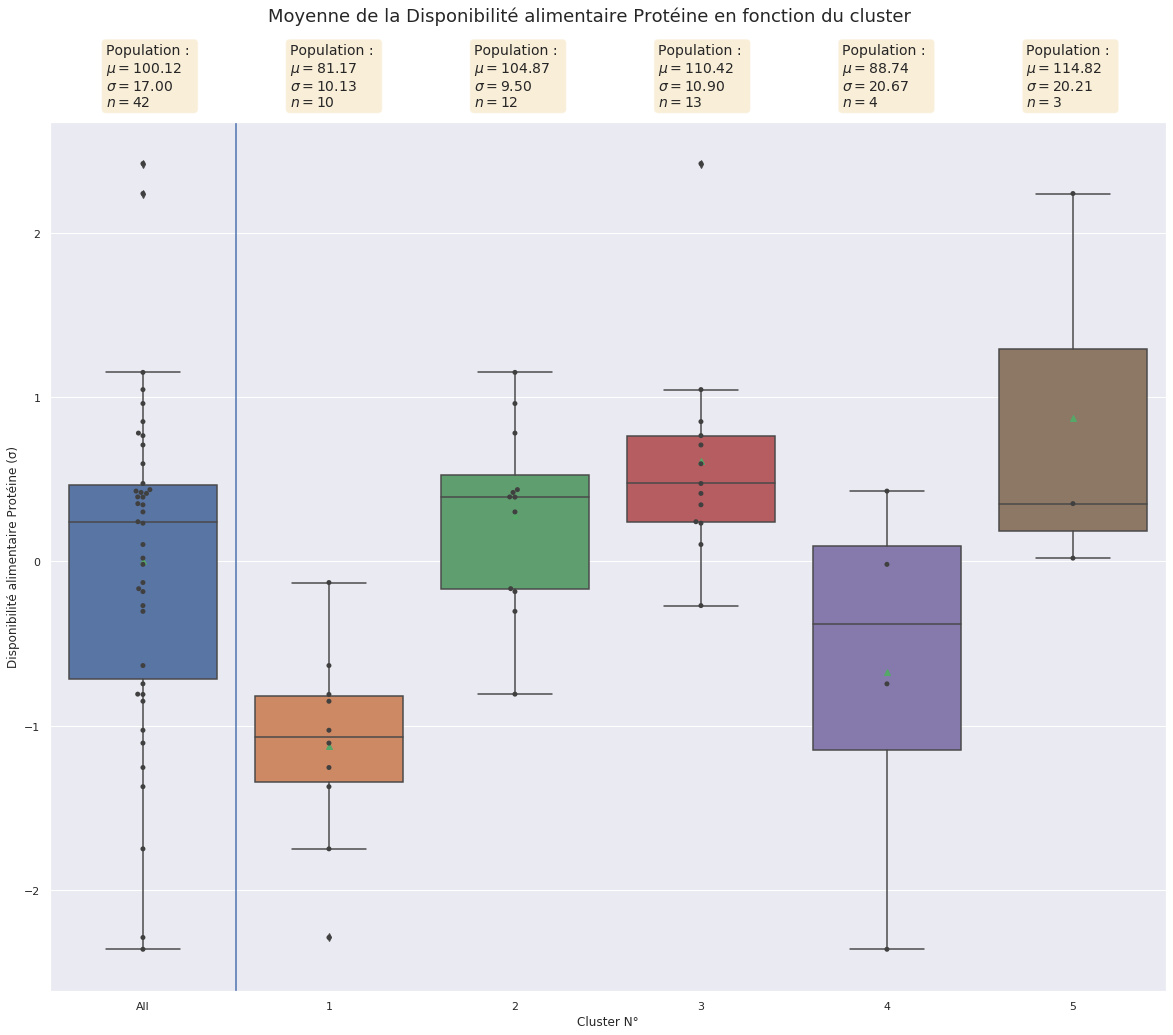

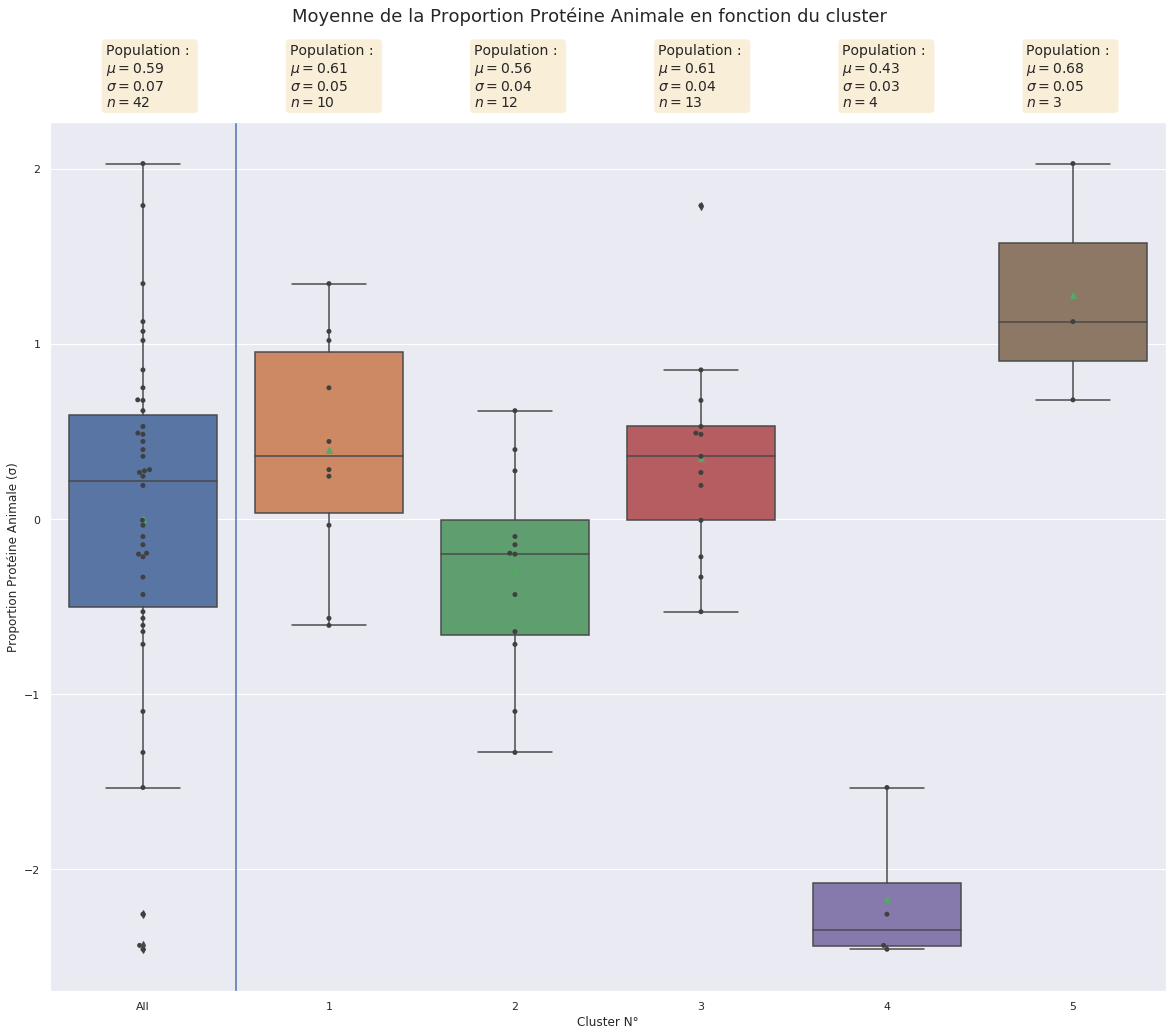

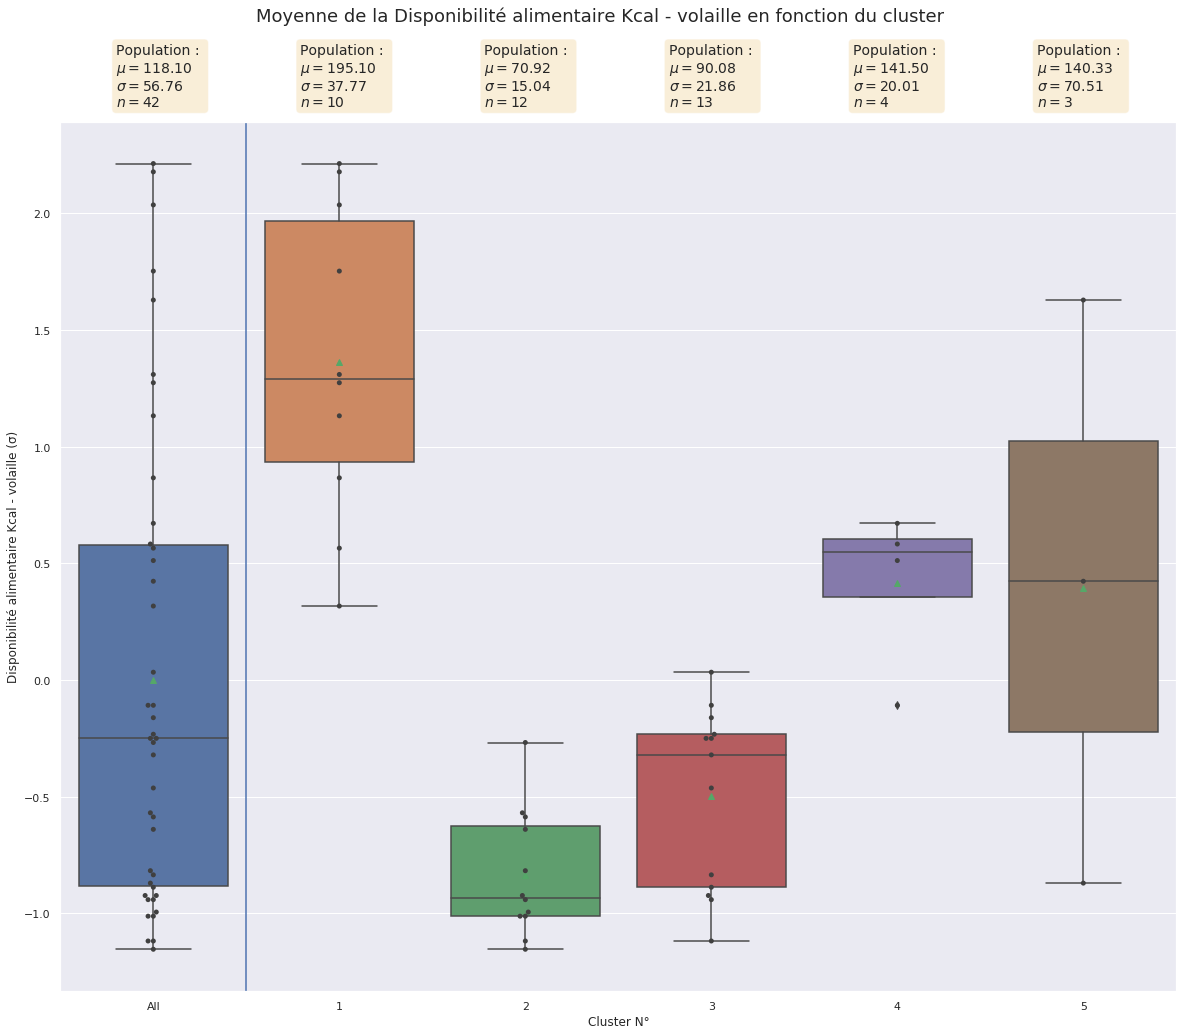

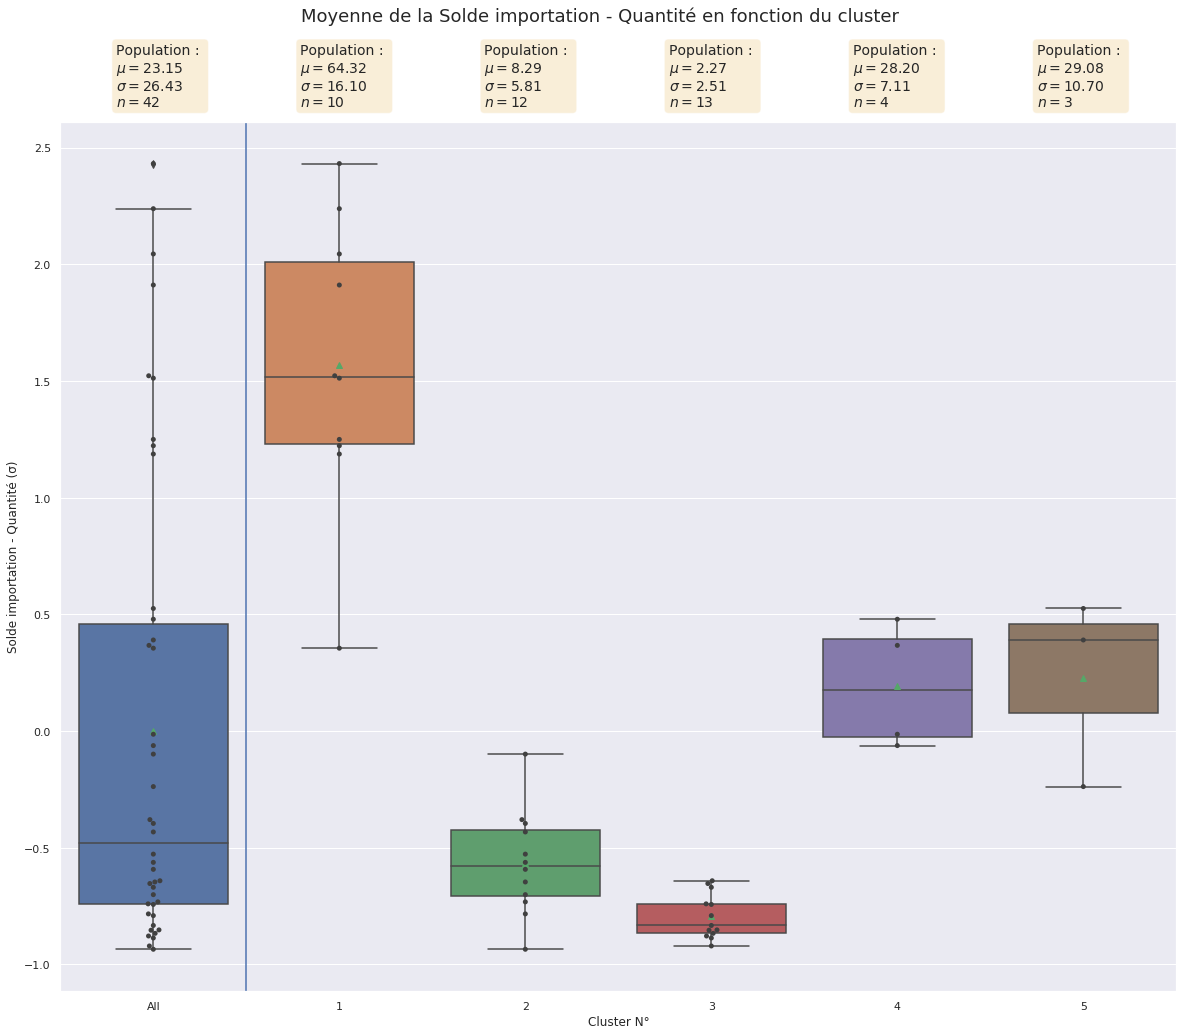

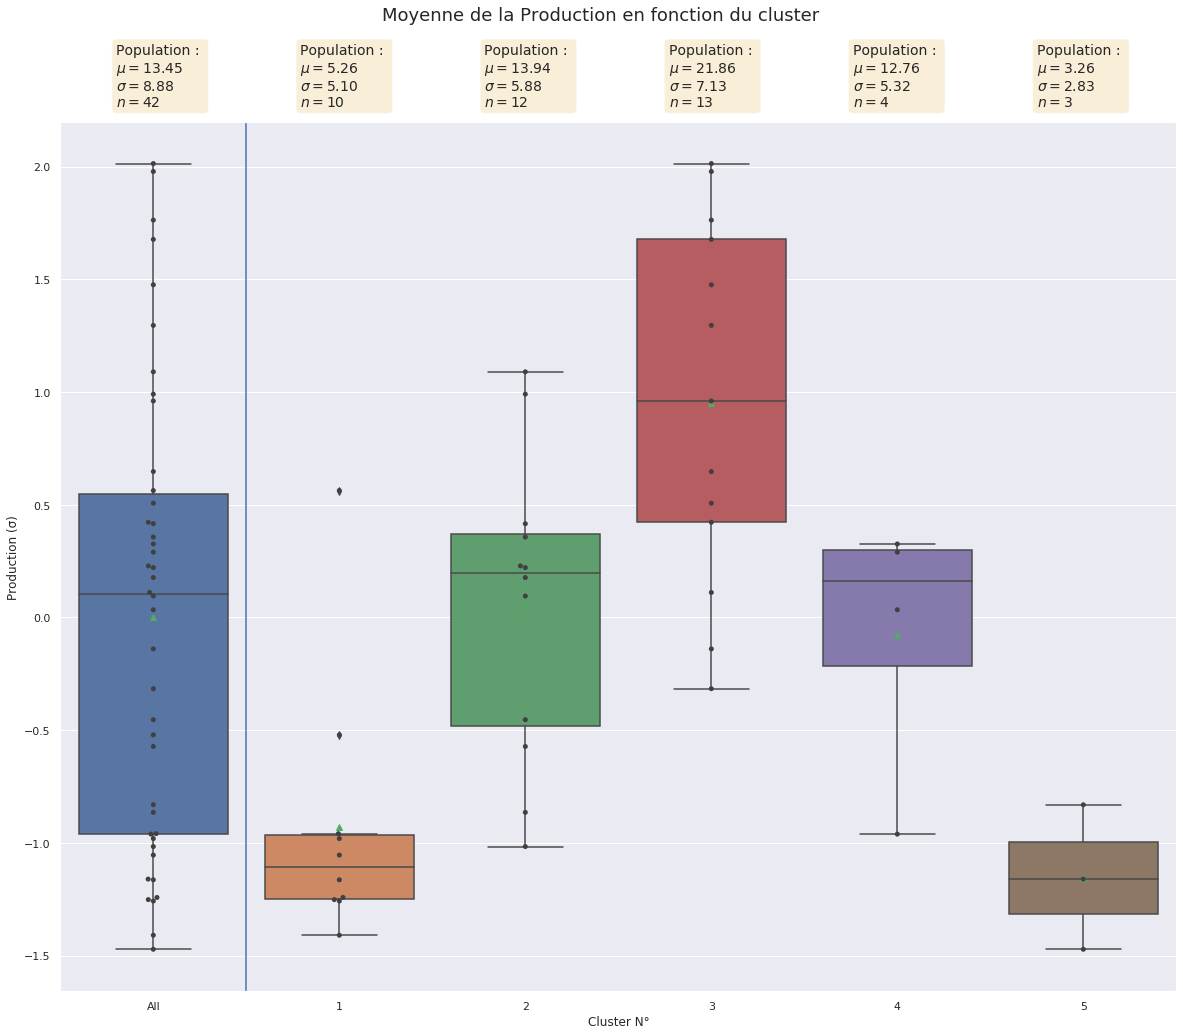

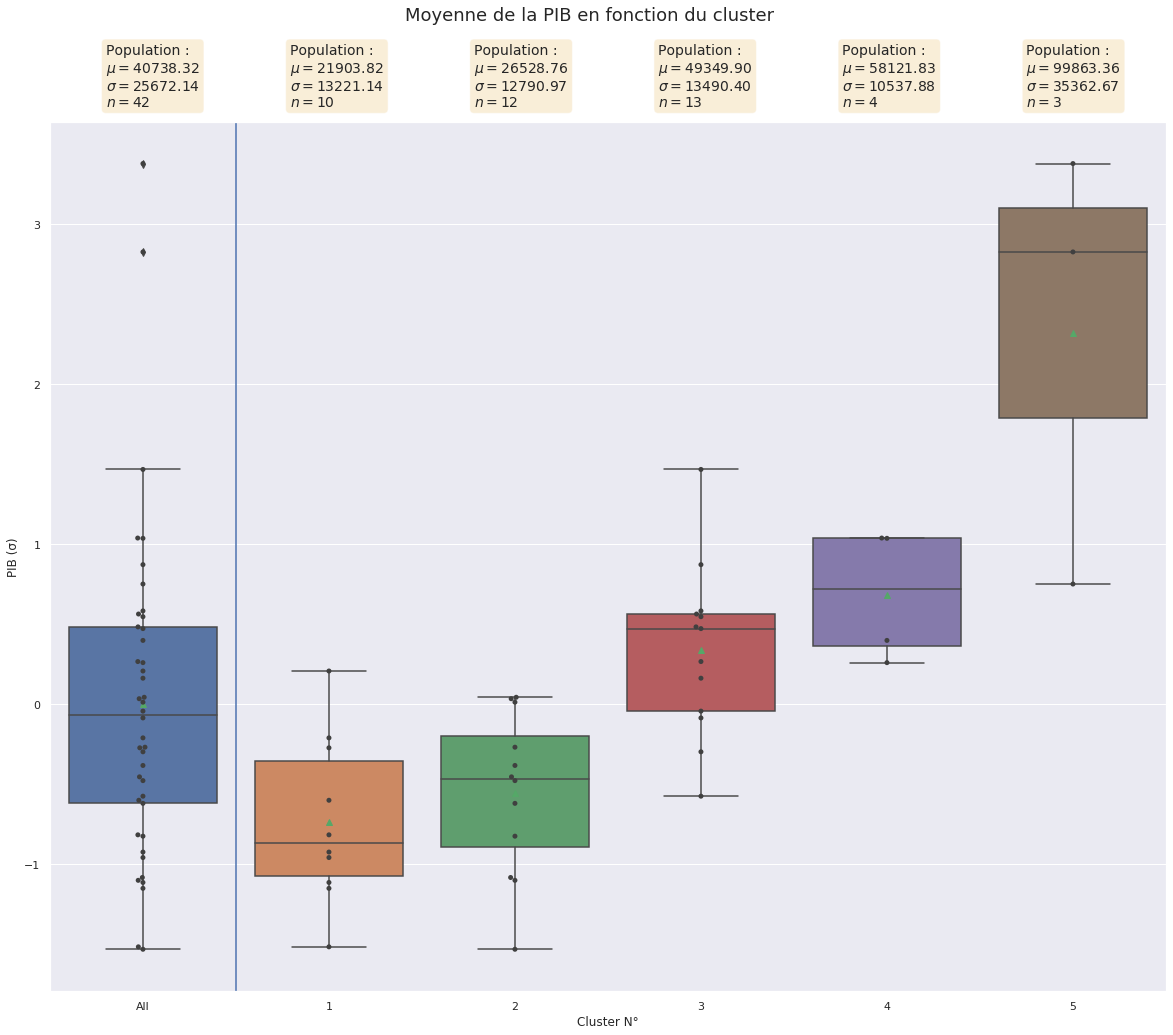

In [20]:
OCR.plotbox(data_short, clusters)

### Dendrogramme

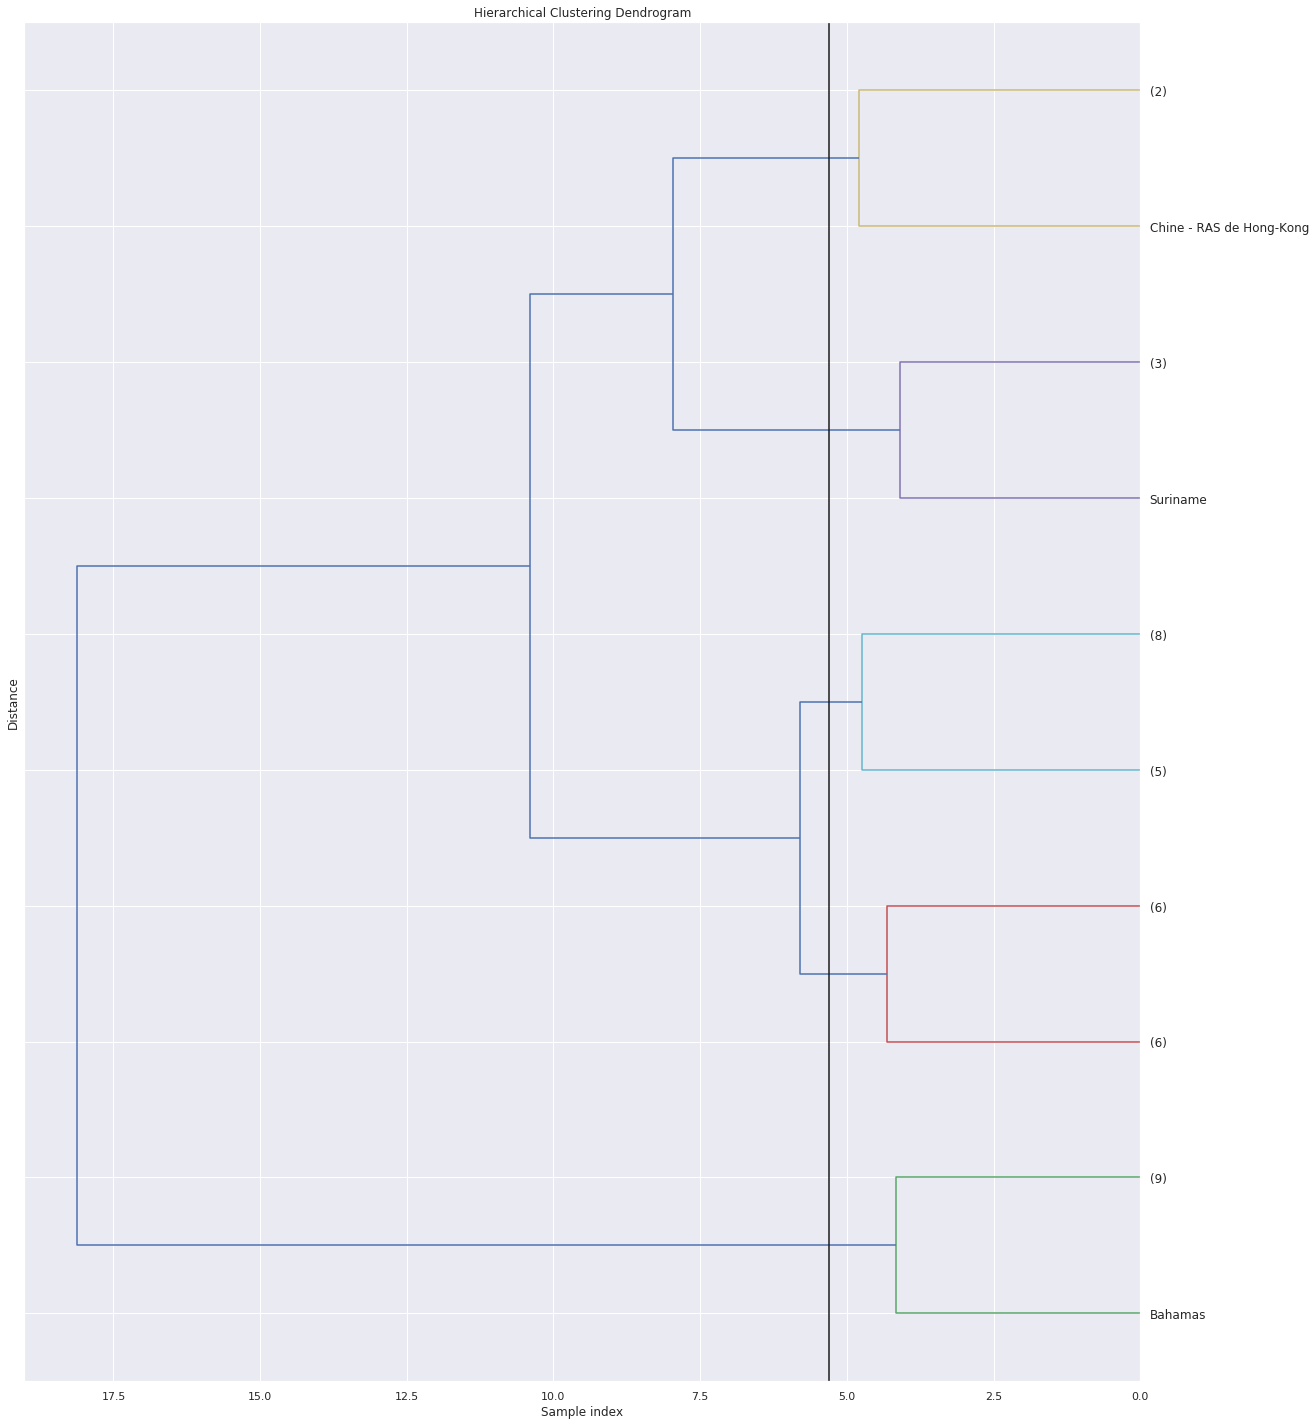

In [21]:
# Affichage du dendrogramme tronqué

x = Z[-__CLUSTER__][2] + (Z[-__CLUSTER__+1][2] - Z[-__CLUSTER__][2]) / 2

plt.figure(figsize=(20,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axvline(x, c='k')
dendrogram(
    Z,
    labels = data_short.index,
    orientation = "left",
    color_threshold = x,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10
)
plt.show()

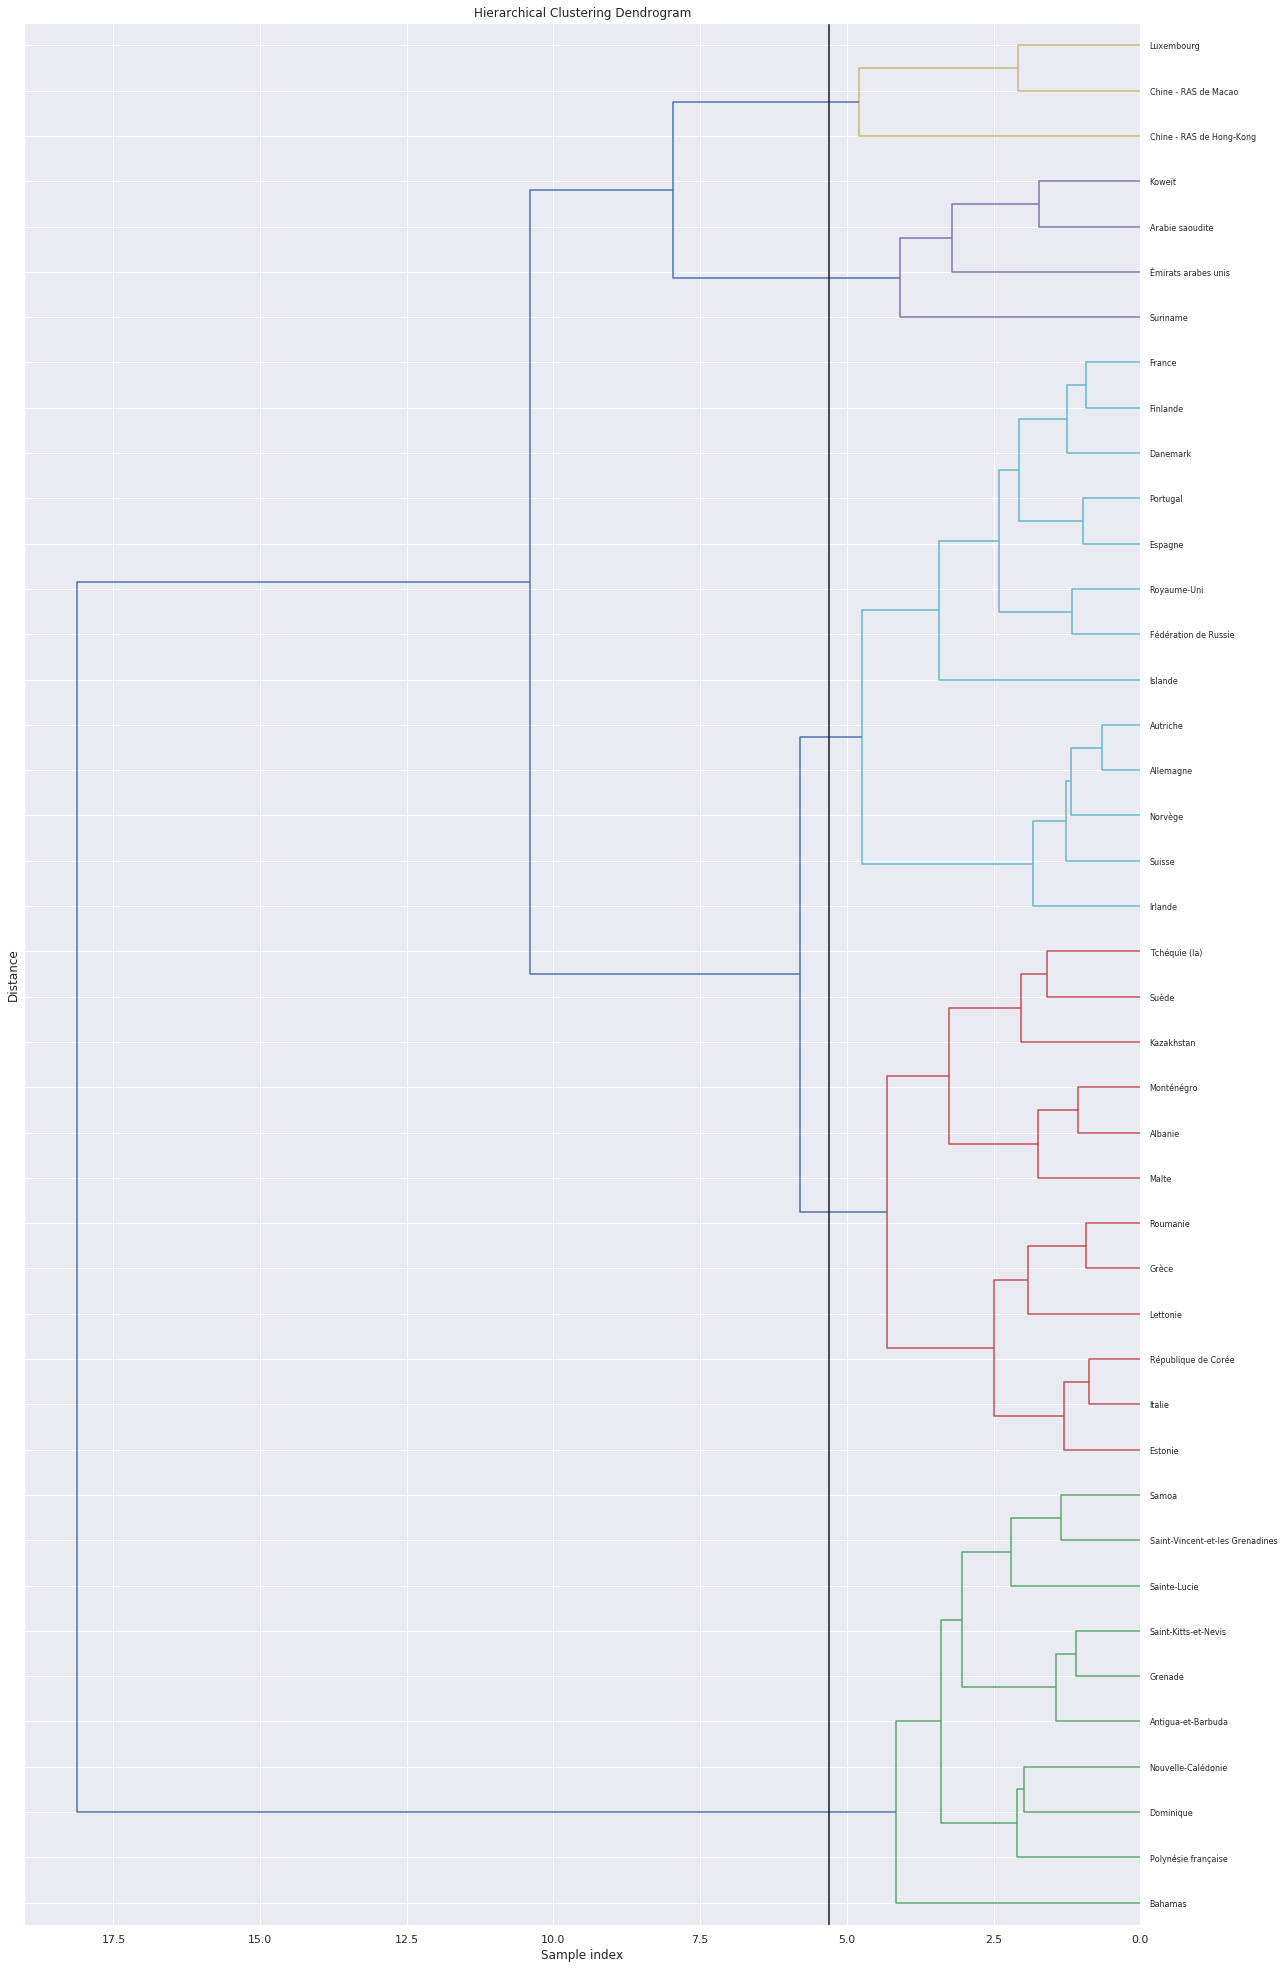

<Figure size 432x288 with 0 Axes>

In [22]:
# Affichage du dendrogramme complet

x = Z[-__CLUSTER__][2] + (Z[-__CLUSTER__+1][2] - Z[-__CLUSTER__][2]) / 2

plt.figure(figsize=(20,35))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axvline(x, c='k')
dendrogram(
    Z,
    labels = data_short.index,
    orientation = "left",
    color_threshold = x,
    leaf_font_size = 8
)
plt.show()

plt.savefig('Images/dendrogramme_short.png')

### Affichage et calcul de centroïde

In [23]:
data_short.groupby(clusters).mean()

Difference de population  Disponibilité alimentaire Kcal  \
1                  1.962696                     2660.700000   
2                  0.270744                     3351.416667   
3                  1.395668                     3478.615385   
4                  5.375119                     3174.750000   
5                  4.622343                     3231.666667   

   Disponibilité alimentaire Protéine  Proportion Protéine Animale  \
1                           81.175000                     0.614681   
2                          104.868333                     0.564573   
3                          110.419231                     0.611484   
4                           88.742500                     0.429029   
5                          114.816667                     0.678726   

   Disponibilité alimentaire Kcal - volaille  Solde importation - Quantité  \
1                                 195.100000                     64.321566   
2                                  70.916667                      8.287589   
3                                  90.076923                      2.271936   
4                                 141.500000                     28.204827   
5                                 140.333333                     29.077552   

   Production           PIB  Clusters  
1    5.258476  21903.819791         1  
2   13.935827  26528.758491         2  
3   21.857788  49349.901143         3  
4   12.758191  58121.825261         4  
5    3.257571  99863.360175         5

### Choix final des pays

Sur les 5 clusters, il n'y a pas d'exporteur nettes de volailles. Concernant la production, le cluster 1, 4 et 5 ne sont pas de gros producteur, mais également, ils sont de gros importateur de volailles, et de gros consommateur de volailles, en regard de leur disponibilité alimentaire en volailles.

Enfin, nous choississons les clusters ayant une disponibilité alimentaire élevées parmi les clusters 1, 4 et 5, et donc, susceptible de consommer. Le clusters 4 et 5 correspondent à cette description. La moyenne du centroïdes est supérieure à 3000 Kcal / habitant / jour

Suite à ces critères, le clusters 4 et 5 sont le plus intéressant pour un marché pour l'importation de poulet. Soit 7 pays :

In [24]:
data_short[data_short['Clusters'].isin([4, 5])]

Difference de population  \
Zone                                                 
Arabie saoudite                           6.599704   
Chine - RAS de Hong-Kong                  2.349336   
Chine - RAS de Macao                      5.200854   
Émirats arabes unis                       2.877878   
Koweït                                    9.002737   
Luxembourg                                6.316839   
Suriname                                  3.020158   

                          Disponibilité alimentaire Kcal  \
Zone                                                       
Arabie saoudite                                   3194.0   
Chine - RAS de Hong-Kong                          3358.0   
Chine - RAS de Macao                              3002.0   
Émirats arabes unis                               3366.0   
Koweït                                            3446.0   
Luxembourg                                        3335.0   
Suriname                                          2693.0   

                          Disponibilité alimentaire Protéine  \
Zone                                                           
Arabie saoudite                                        87.54   
Chine - RAS de Hong-Kong                              137.93   
Chine - RAS de Macao                                  100.46   
Émirats arabes unis                                   107.35   
Koweït                                                 99.82   
Luxembourg                                            106.06   
Suriname                                               60.26   

                          Proportion Protéine Animale  \
Zone                                                    
Arabie saoudite                              0.422778   
Chine - RAS de Hong-Kong                     0.733053   
Chine - RAS de Macao                         0.667728   
Émirats arabes unis                          0.408291   
Koweït                                       0.475155   
Luxembourg                                   0.635395   
Suriname                                     0.409890   

                          Disponibilité alimentaire Kcal - volaille  \
Zone                                                                  
Arabie saoudite                                               151.0   
Chine - RAS de Hong-Kong                                      210.0   
Chine - RAS de Macao                                          142.0   
Émirats arabes unis                                           147.0   
Koweït                                                        156.0   
Luxembourg                                                     69.0   
Suriname                                                      112.0   

                          Solde importation - Quantité  Production  \
Zone                                                                 
Arabie saoudite                              21.509807   16.321412   
Chine - RAS de Hong-Kong                     33.395745    3.203391   
Chine - RAS de Macao                         36.942450    6.113172   
Émirats arabes unis                          35.732355    4.963635   
Koweït                                       32.790119   13.745963   
Luxembourg                                   16.894460    0.456150   
Suriname                                     22.787029   16.001753   

                                    PIB  Clusters  
Zone                                               
Arabie saoudite            47309.124604         4  
Chine - RAS de Hong-Kong   59849.248176         5  
Chine - RAS de Macao      126918.226522         5  
Émirats arabes unis        67183.626557         4  
Koweït                     50855.499960         4  
Luxembourg                112822.605828         5  
Suriname                   67139.049922         4

## Partie IV - Réalisation du ACP

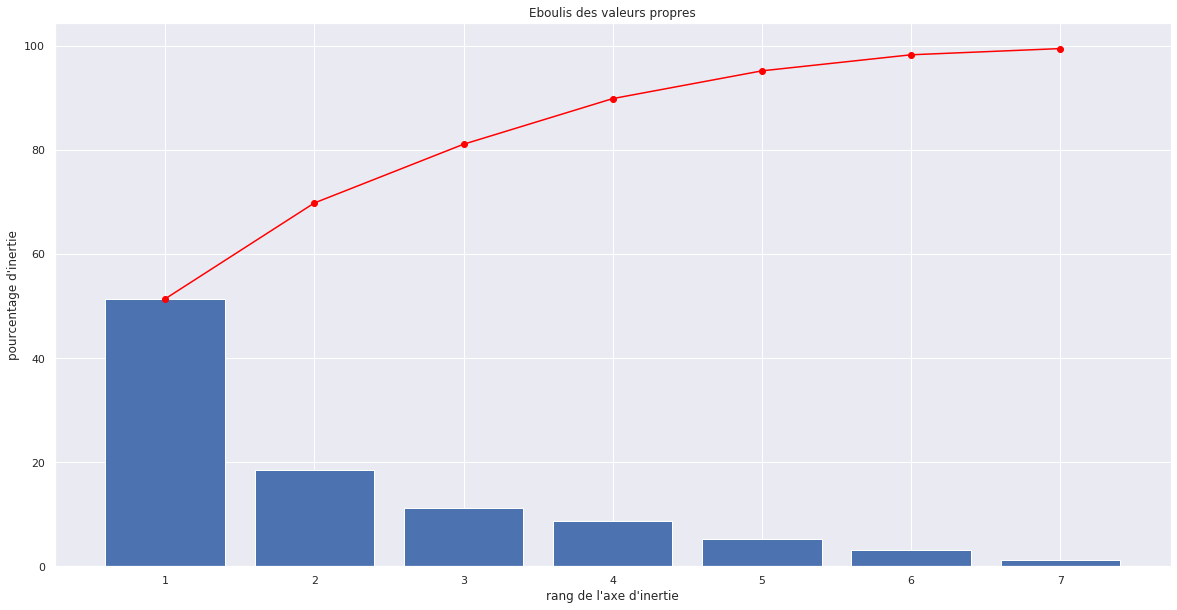

In [25]:
fig, axes = plt.subplots(figsize = (20, 10))

# choix du nombre de composantes à calculer
n_comp = 7

# selection des colonnes à prendre en compte dans l'ACP

data_pca = df[ ['Difference de population', 'Disponibilité alimentaire Kcal', 'Disponibilité alimentaire Protéine', 'Proportion Protéine Animale', 'Disponibilité alimentaire Kcal - volaille', 'Solde importation - Quantité', 'Production', 'PIB']]

# préparation des données pour l'ACP
X = data_pca.values
names = df.index #pour avoir les intitulés
features = df.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
OCR.display_scree_plot(pca)

plt.show()

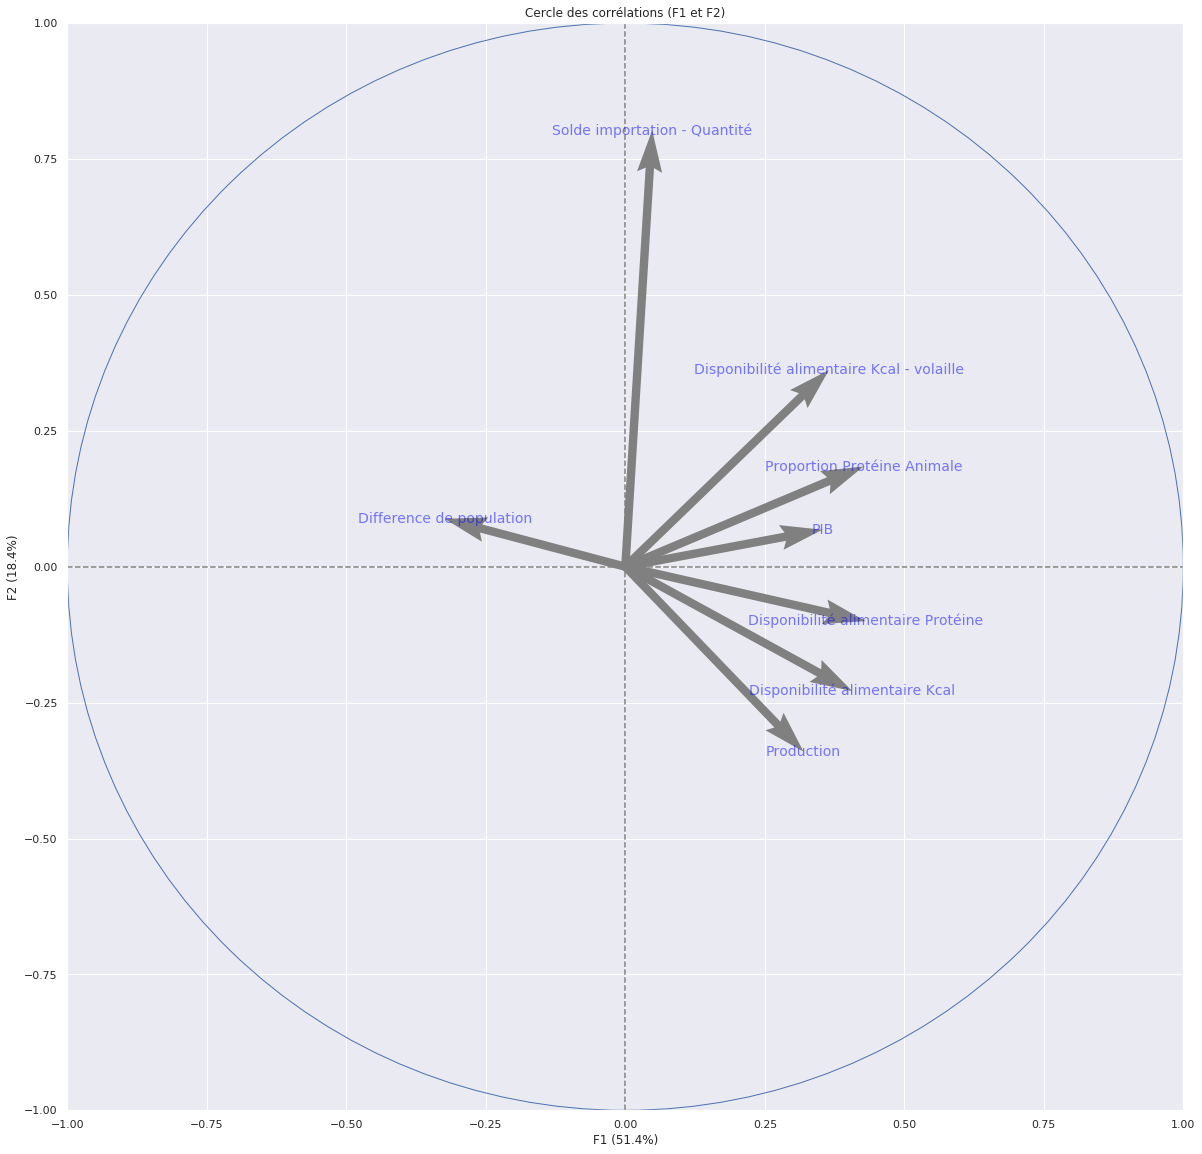

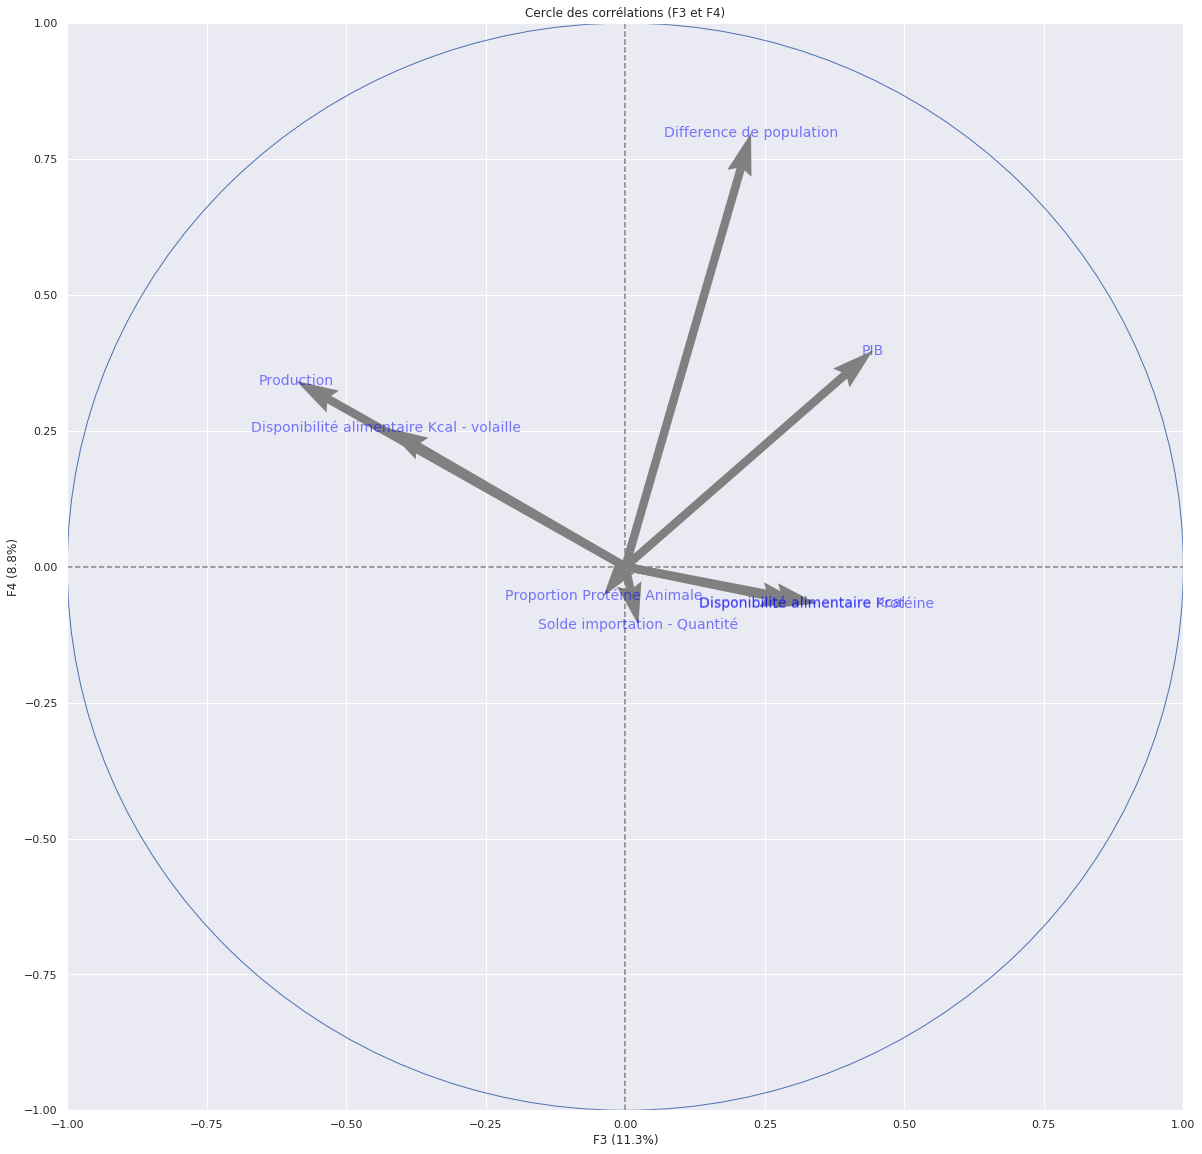

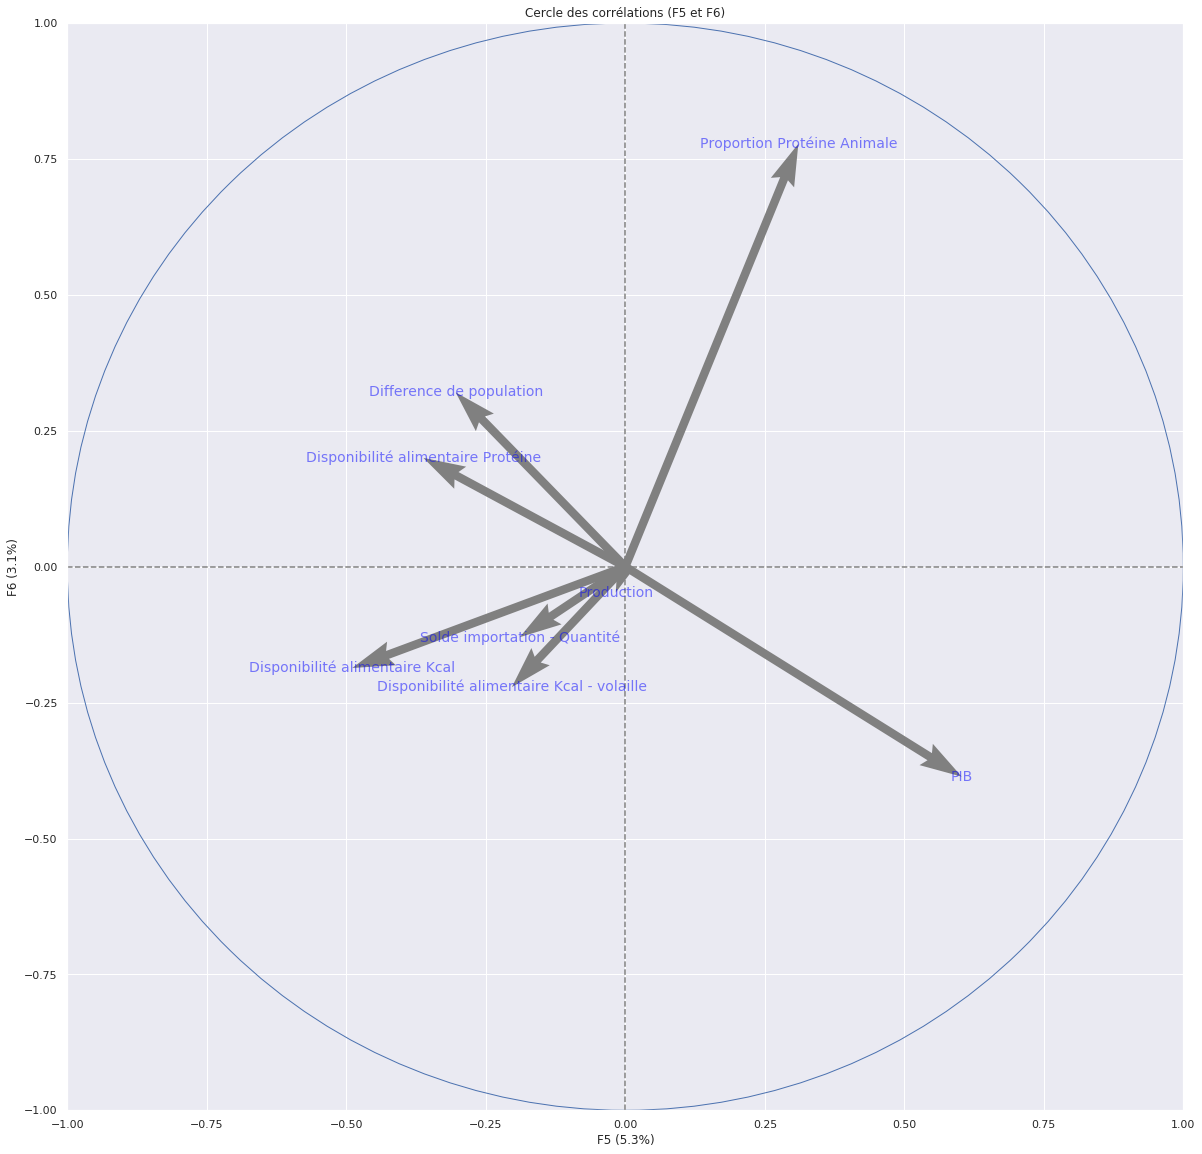

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

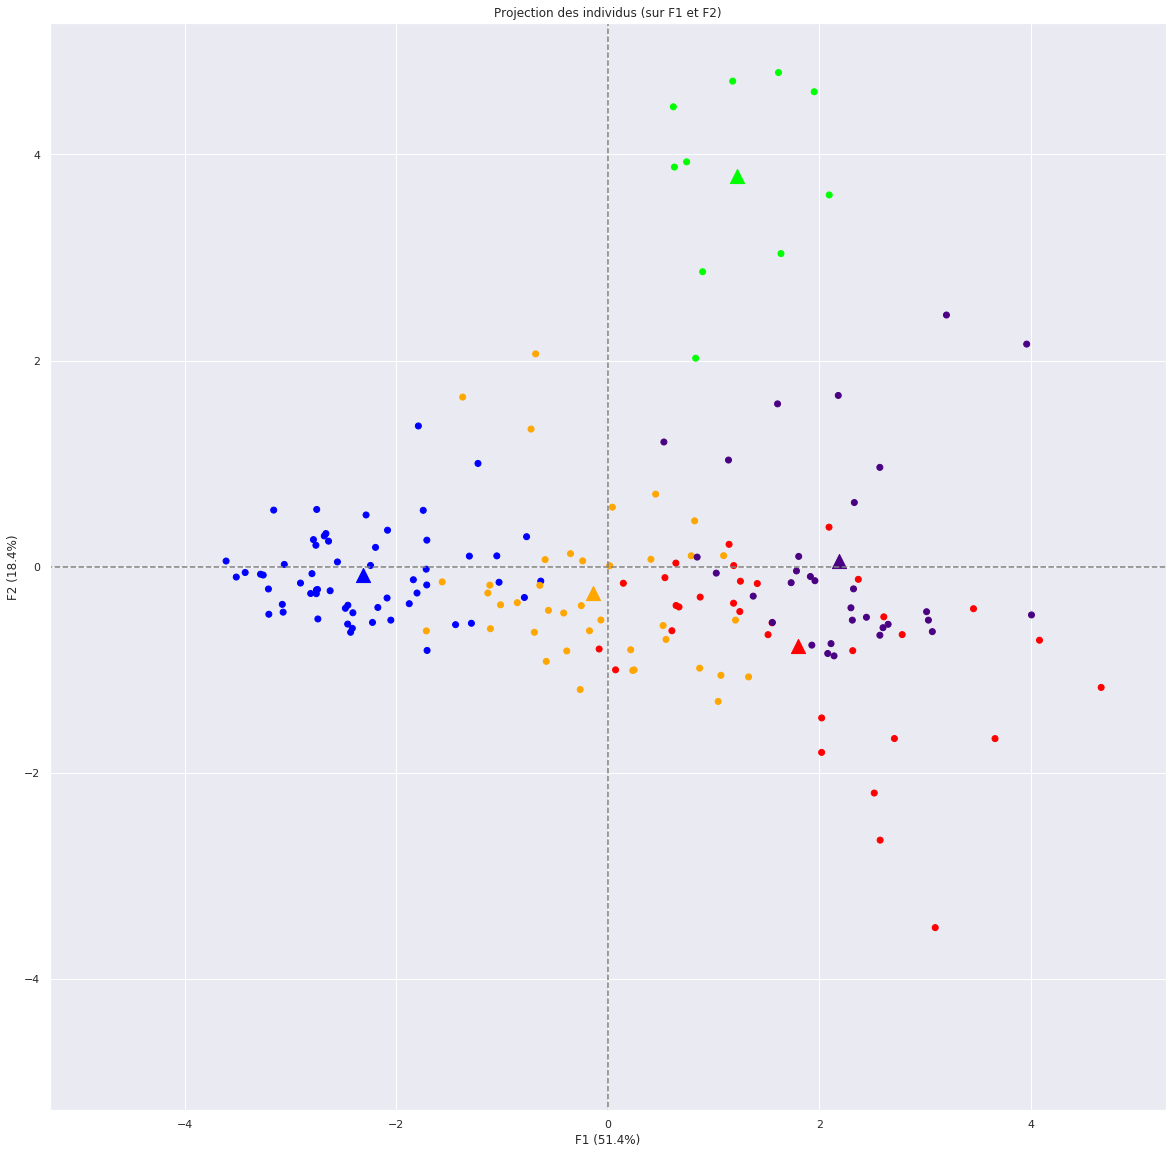

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

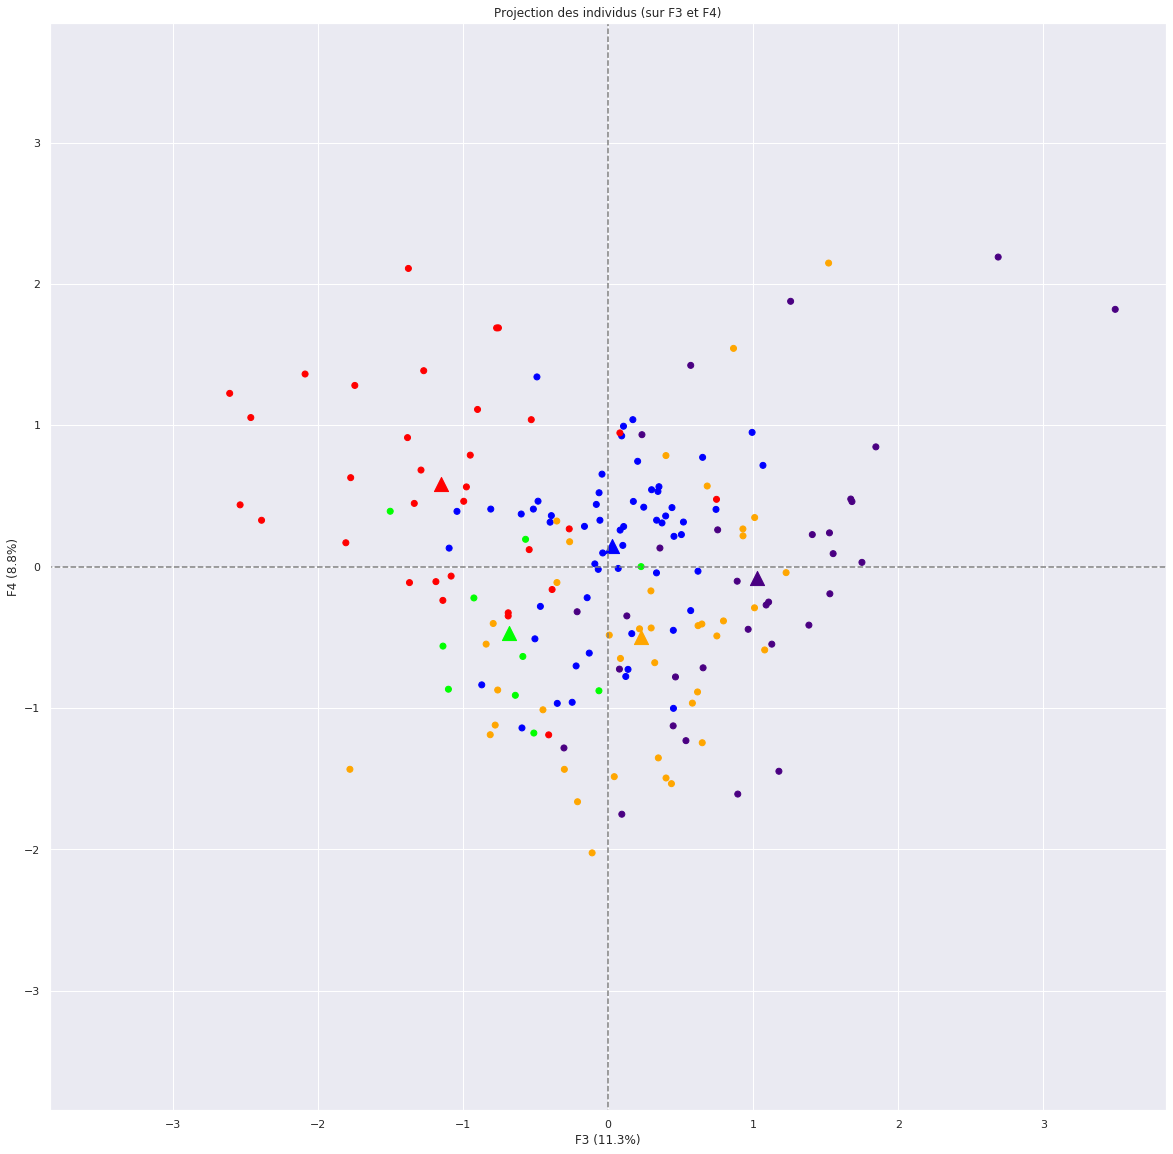

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

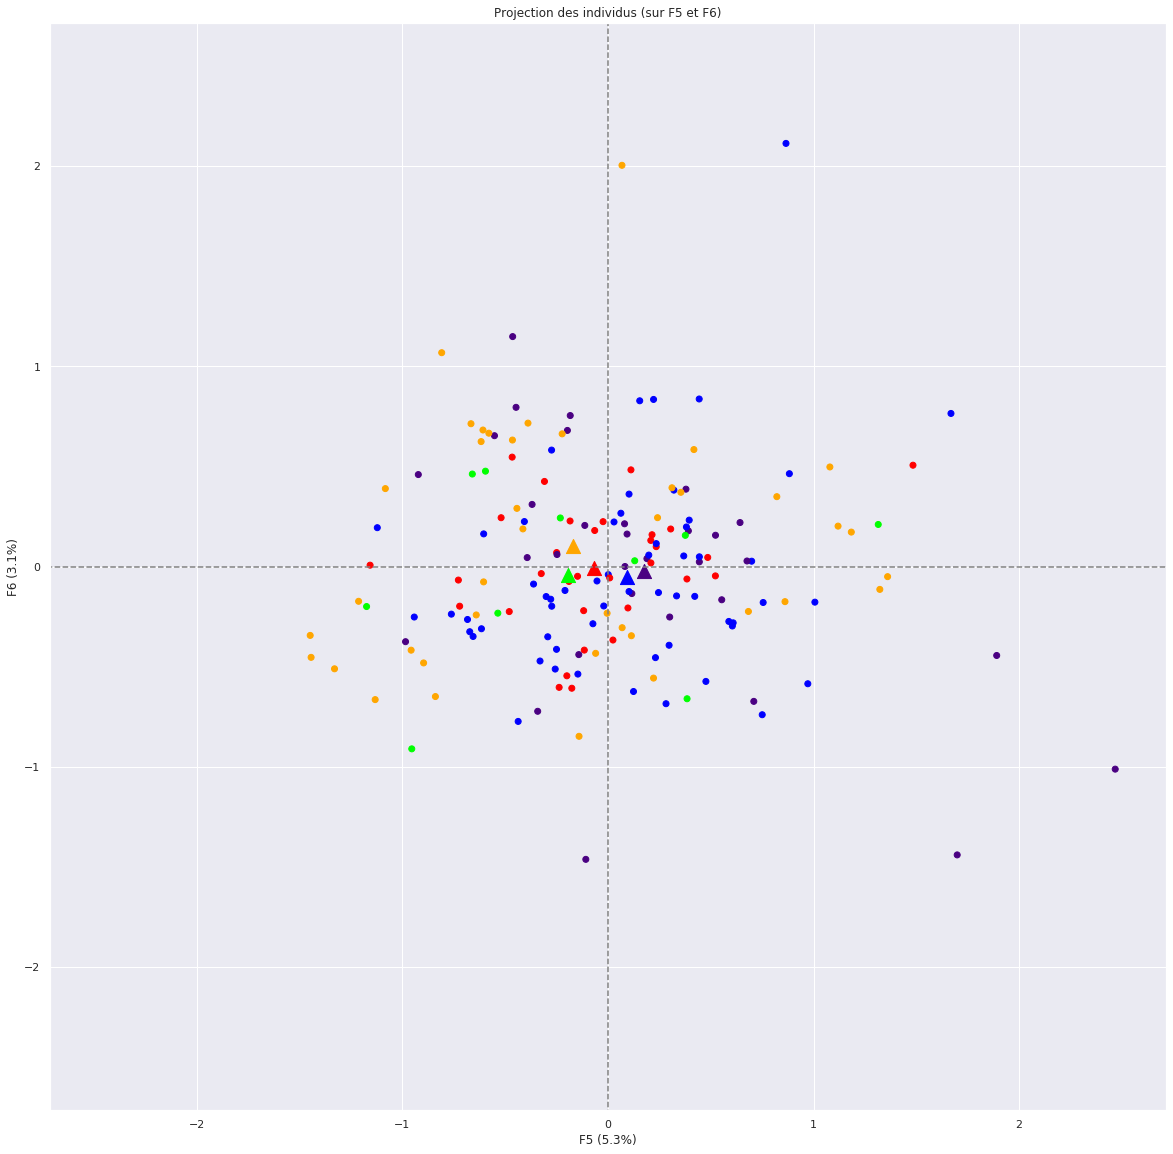

In [26]:
# Cercle des corrélations
pcs = pca.components_
OCR.display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
OCR.display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], df['Clusters'])#, labels = np.array(names))

---------------------------- Début Brouillon ------------------------

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

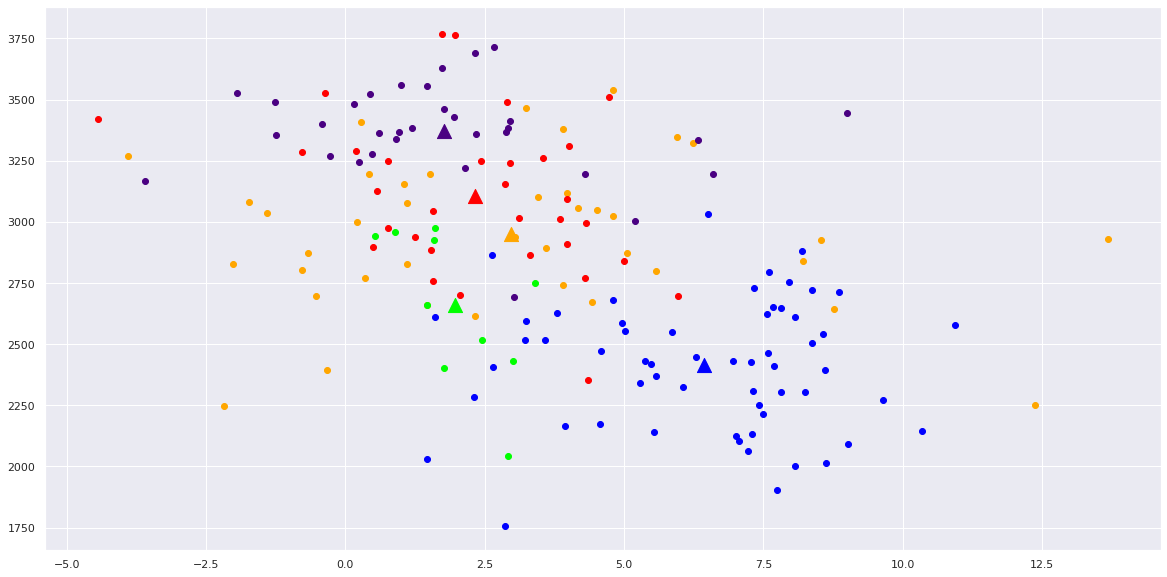

In [27]:
fig = plt.figure(figsize=(20,10))
        
color1=[0, 0, 1, 1]
color2=[1, 0.65, 0, 1]
color3=[0, 1, 0, 1]
color4=[1, 0, 0, 1]
color5=[0.29, 0, 0.51, 1]

colormap = np.array([color1, color2, color3, color4, color5])

# affichage des points
for i in range(1,6):
    plt.scatter(data[data['Clusters'] == i].iloc[:, 0], data[data['Clusters'] == i].iloc[:, 1], c = colormap[i-1])
    meanD1 = data[data['Clusters'] == i].iloc[:, 0].mean()
    meanD2 = data[data['Clusters'] == i].iloc[:, 1].mean()
    plt.scatter(meanD1, meanD2, marker = '^', s = 200, c = colormap[i-1])
    
plt.show()

### Calcul de correlation

In [28]:
for i in range(len(df.columns)-1):
    for j in range(i+1, len(df.columns)-1):
        statp, pp = pearsonr(df.iloc[:,i], df.iloc[:,j])
        stats, ps = spearmanr(df.iloc[:,i], df.iloc[:,j])
        print('corrélation entre', df.columns[i], 'et', df.columns[j])
        print('Pearson : stat=%.3f, p=%.3f' % (statp, pp))
        print('Spearman : stat=%.3f, p=%.3f' % (stats, ps))
        if pp > 0.05:
            print('Probably independent following Pearson Test')
        else:
            print('Probably dependent following Pearson Test')
            
        if ps > 0.05:
            print('Probably independent following Spearman Test\n')
        else:
            print('Probably dependent following Spearman Test\n')

corrélation entre Difference de population et Disponibilité alimentaire Kcal
Pearson : stat=-0.491, p=0.000
Spearman : stat=-0.510, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Difference de population et Disponibilité alimentaire Protéine
Pearson : stat=-0.496, p=0.000
Spearman : stat=-0.524, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Difference de population et Proportion Protéine Animale
Pearson : stat=-0.559, p=0.000
Spearman : stat=-0.573, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Difference de population et Disponibilité alimentaire Kcal - volaille
Pearson : stat=-0.375, p=0.000
Spearman : stat=-0.464, p=0.000
Probably dependent following Pearson Test
Probably dependent following Spearman Test

corrélation entre Difference de population et Solde importation - Quantité
Pearson :

In [29]:
pcs

array([[-0.32383037,  0.4066399 ,  0.43059624,  0.42685327,  0.36485371,
         0.04806502,  0.3194151 ,  0.35313817],
       [ 0.08809222, -0.22878293, -0.10005146,  0.18443827,  0.36181702,
         0.80281928, -0.34031547,  0.0680102 ],
       [ 0.22532401,  0.31757457,  0.34313767, -0.03926551, -0.42917362,
         0.02347312, -0.589611  ,  0.4435179 ],
       [ 0.79767889, -0.06691267, -0.06772874, -0.05408433,  0.25594794,
        -0.10686634,  0.34155251,  0.39765677],
       [-0.30402359, -0.48947254, -0.36197397,  0.31005703, -0.20333734,
        -0.18918818, -0.01720076,  0.60281976],
       [ 0.32069115, -0.18636754,  0.20023212,  0.77784956, -0.22149027,
        -0.12966329, -0.04754661, -0.38619981],
       [-0.0708468 , -0.63265199,  0.70359193, -0.26964357,  0.13144281,
        -0.09280265, -0.01992177,  0.02639159]])

In [30]:
color1=(0, 0, 1, 1)
color2=(1, 0.65, 0, 1)
color3=(0, 1, 0, 1)
color4=(1, 0, 0, 1)
color5=(0.29, 0, 0.51, 1)

colormap = np.array([color1, color2, color3, color4, color5]).reshape(1,-1)
colormap

array([[0.  , 0.  , 1.  , 1.  , 1.  , 0.65, 0.  , 1.  , 0.  , 1.  , 0.  ,
        1.  , 1.  , 0.  , 0.  , 1.  , 0.29, 0.  , 0.51, 1.  ]])

## Partie IV - Choix des Clusters

Nous allons choisir les clusters 1 - bleu - et 5 - mauve

Test de normalité pour le cluster 1 et la colonne Difference de population
stat=0.952, p=0.022


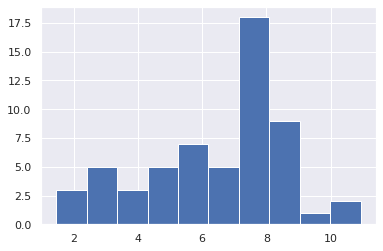

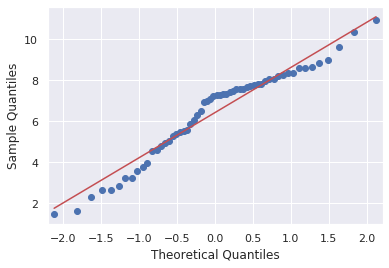

Probably not Gaussian

Test de normalité pour le cluster 1 et la colonne Disponibilité alimentaire Kcal
stat=0.993, p=0.984


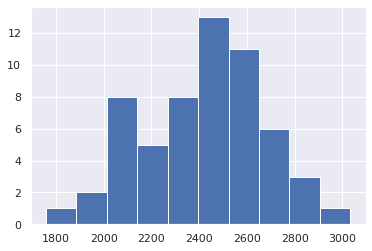

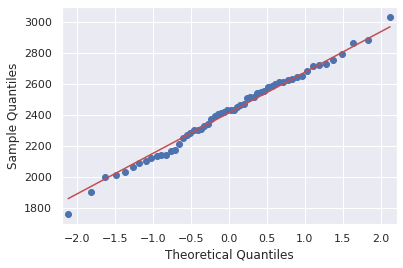

Probably Gaussian

Test de normalité pour le cluster 1 et la colonne Disponibilité alimentaire Protéine
stat=0.983, p=0.609


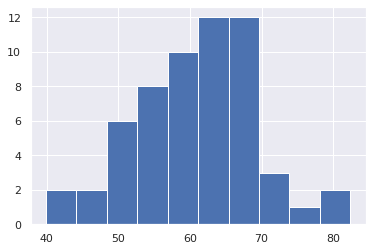

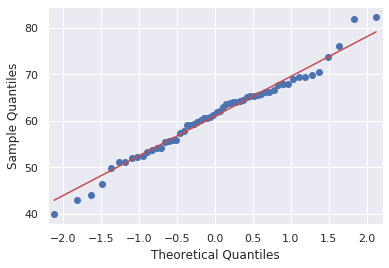

Probably Gaussian

Test de normalité pour le cluster 1 et la colonne Proportion Protéine Animale
stat=0.902, p=0.000


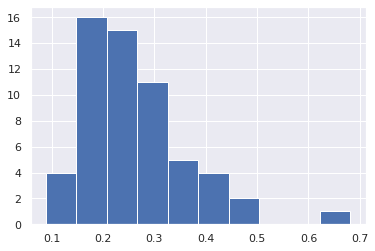

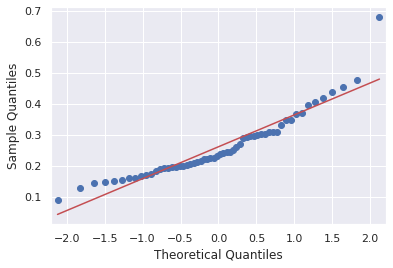

Probably not Gaussian

Test de normalité pour le cluster 1 et la colonne Disponibilité alimentaire Kcal - volaille
stat=0.778, p=0.000


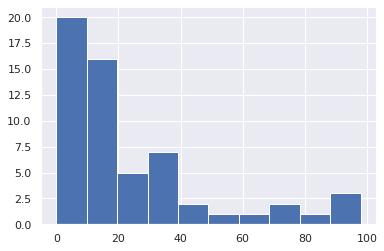

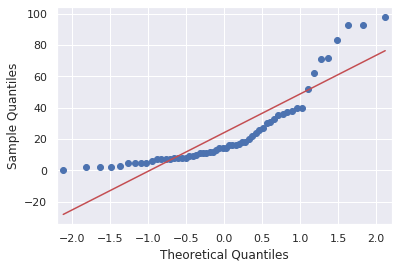

Probably not Gaussian

Test de normalité pour le cluster 1 et la colonne Solde importation - Quantité
stat=0.739, p=0.000


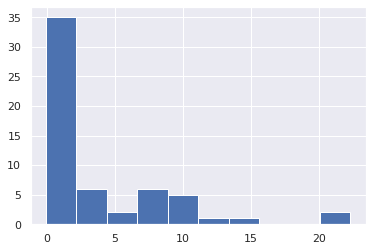

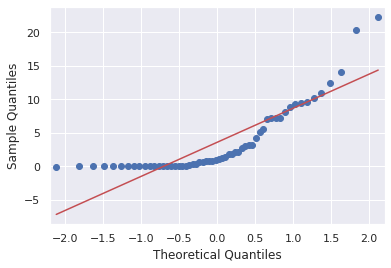

Probably not Gaussian

Test de normalité pour le cluster 1 et la colonne Production
stat=0.630, p=0.000


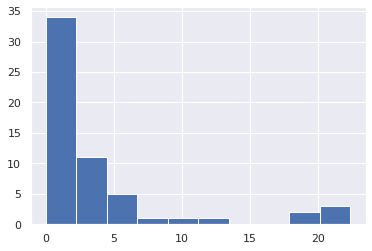

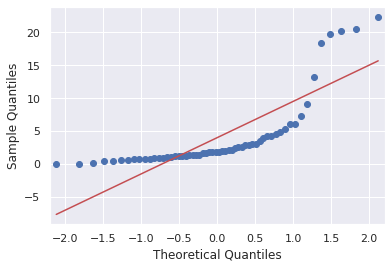

Probably not Gaussian

Test de normalité pour le cluster 1 et la colonne PIB
stat=0.689, p=0.000


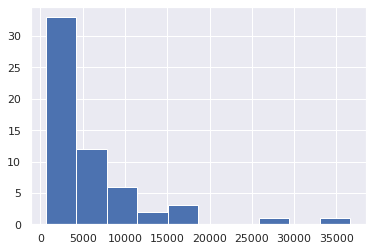

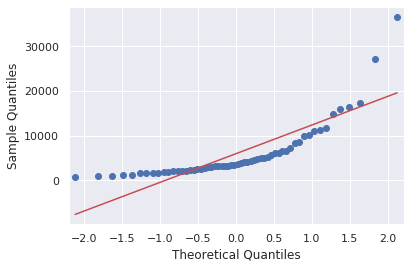

Probably not Gaussian

Test de normalité pour le cluster 5 et la colonne Difference de population
stat=0.957, p=0.221


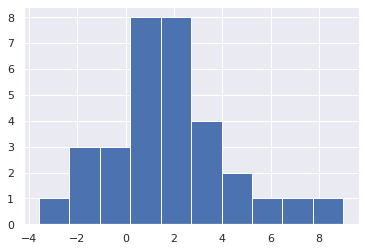

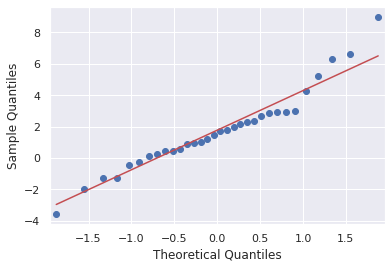

Probably Gaussian

Test de normalité pour le cluster 5 et la colonne Disponibilité alimentaire Kcal
stat=0.920, p=0.021


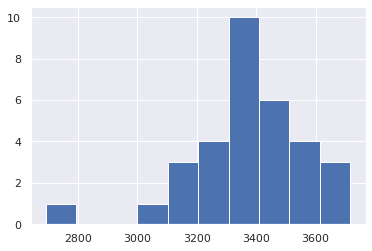

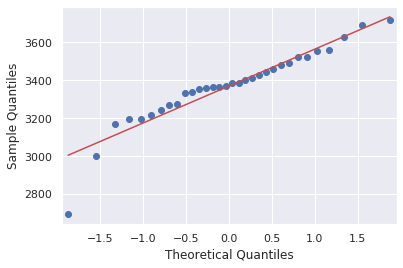

Probably not Gaussian

Test de normalité pour le cluster 5 et la colonne Disponibilité alimentaire Protéine
stat=0.900, p=0.006


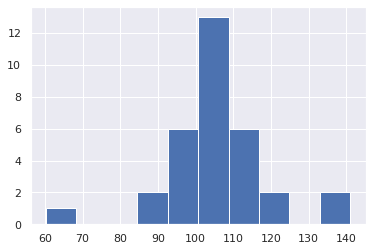

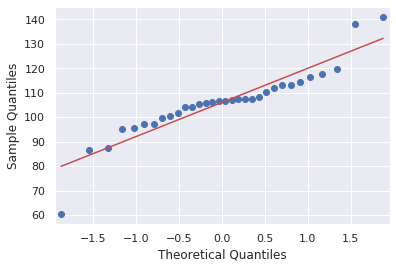

Probably not Gaussian

Test de normalité pour le cluster 5 et la colonne Proportion Protéine Animale
stat=0.951, p=0.149


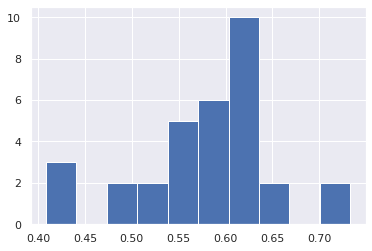

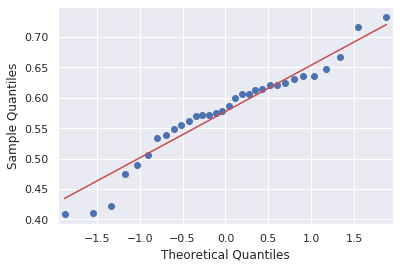

Probably Gaussian

Test de normalité pour le cluster 5 et la colonne Disponibilité alimentaire Kcal - volaille
stat=0.877, p=0.002


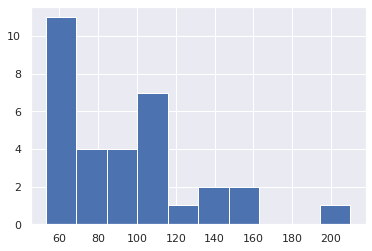

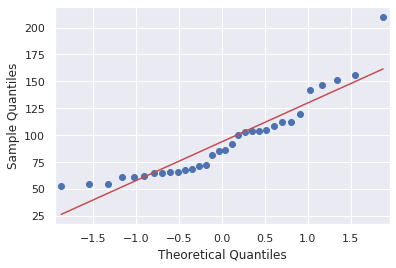

Probably not Gaussian

Test de normalité pour le cluster 5 et la colonne Solde importation - Quantité
stat=0.832, p=0.000


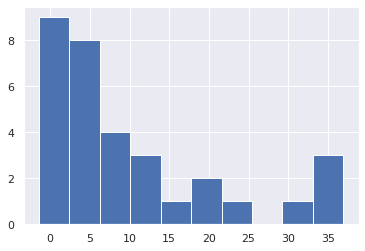

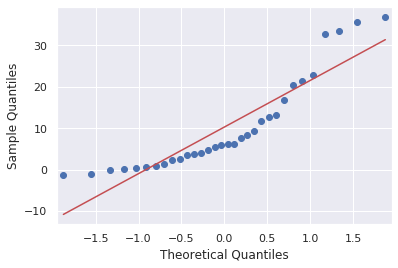

Probably not Gaussian

Test de normalité pour le cluster 5 et la colonne Production
stat=0.971, p=0.517


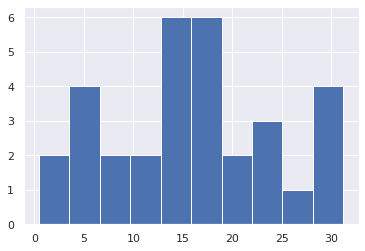

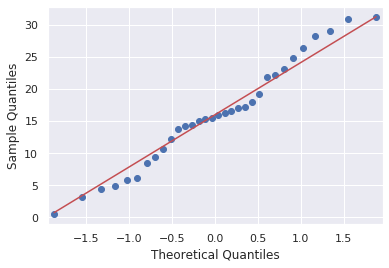

Probably Gaussian

Test de normalité pour le cluster 5 et la colonne PIB
stat=0.909, p=0.011


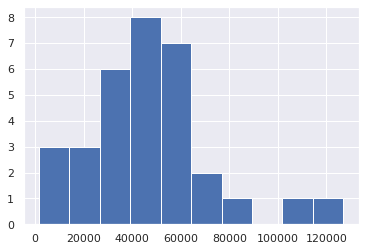

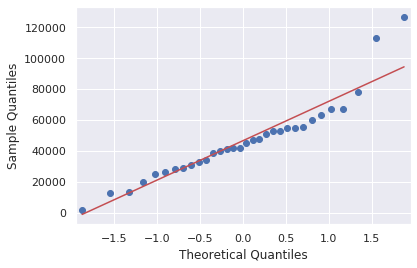

Probably not Gaussian



In [31]:
for i in (1,5):
    for j in range(0, len(df.columns)-1):
        stat, p = shapiro(df[df['Clusters'] == i].iloc[:, j])
        print('Test de normalité pour le cluster', i, 'et la colonne', df.columns[j])
        print('stat=%.3f, p=%.3f' % (stat, p))
        plt.hist(df[df['Clusters'] == i].iloc[:, j])
        qqplot(df[df['Clusters'] == i].iloc[:, j], line='s')
        plt.show()
        if p > 0.05:
            print('Probably Gaussian\n')
        else:
            print('Probably not Gaussian\n')

In [32]:
df[df['Clusters'] == 1].iloc[:, 0]

0       8.059596
5       9.642191
14      3.236388
19      7.949388
22      5.281441
25      8.373786
26      3.577674
27      4.590488
28      7.670010
37      7.312320
39      7.323958
43      4.808813
48      4.965756
51      2.648447
53      7.806077
59      8.575403
61      6.514094
64      5.863031
65      7.595098
66      7.422845
68      3.945961
69      5.020888
71      7.697629
72      3.217805
75      8.363775
82      8.859842
84      7.011151
88      2.299274
90      8.187413
91      7.288457
95      7.745720
97      7.813437
105     5.577769
107     8.247507
109     5.377857
110     2.629857
111     3.792102
112    10.934906
113     7.580062
118    10.336222
120     6.061002
129     2.868569
134     1.463006
135     8.598154
138     7.489634
143     5.485538
144     8.071741
146     6.293317
149     6.948086
150     1.606965
154     7.065551
155     9.011138
158     5.544295
159     7.280278
166     7.572414
169     7.225949
170     8.626110
171     4.564857
Name: Differen

## Partie IV - Application de l'ACP sur le Dendrogramme

### Préparation des données - Centrage et Réduction

In [33]:
# préparation des données pour le clustering
X = pd.DataFrame(data = X_projected).values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# generate the linkage matrix
Z = linkage(X_scaled, 'ward')

### Cophenetic correlation

In [34]:
c, coph_dists = cophenet(Z, pdist(X_projected))
f"Cophenetic correlation : {c:0.2f}"

'Cophenetic correlation : 0.43'

### Courbe de Lorenz

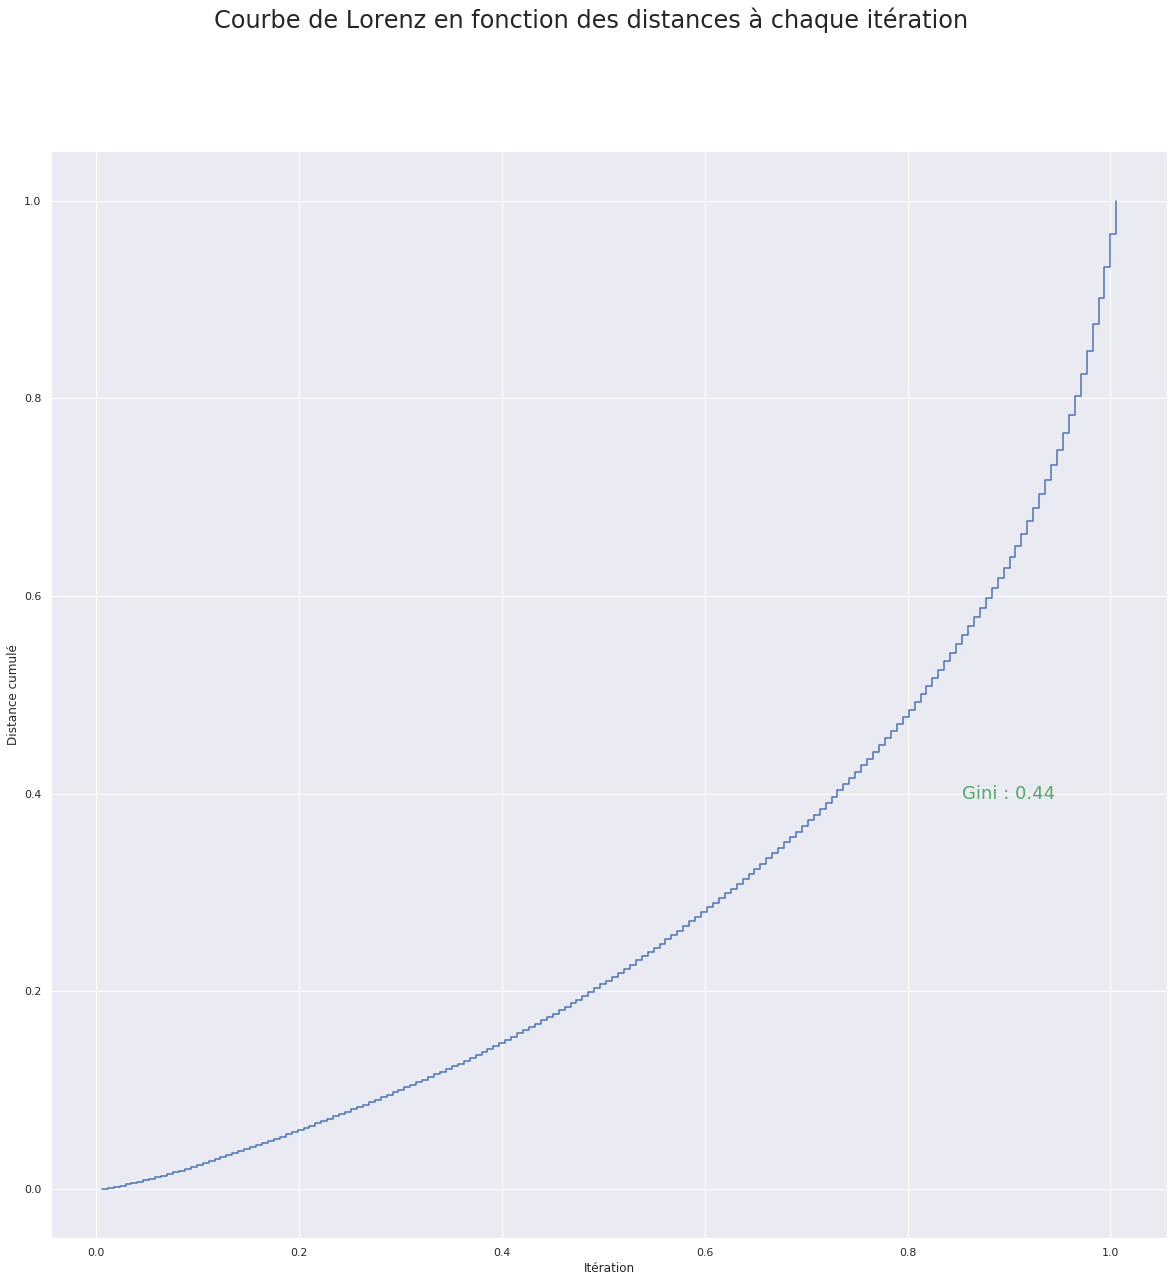

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))

fig.suptitle("Courbe de Lorenz en fonction des distances à chaque itération", fontsize= _FONTSIZETITLE_)

lorenz, n, gini = OCR.lorenz(pd.DataFrame(data=Z[:,2]))
xaxis = np.linspace(1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

axes.plot(xaxis,lorenz,drawstyle='steps-post')
axes.text(0.9, 0.4, f"Gini : {gini:0.2f}", {'color': 'C2', 'fontsize': 18}, va="center", ha="center")
axes.set_xlabel('Itération')
axes.set_ylabel('Distance cumulé')

plt.show()

### Dendrogramme

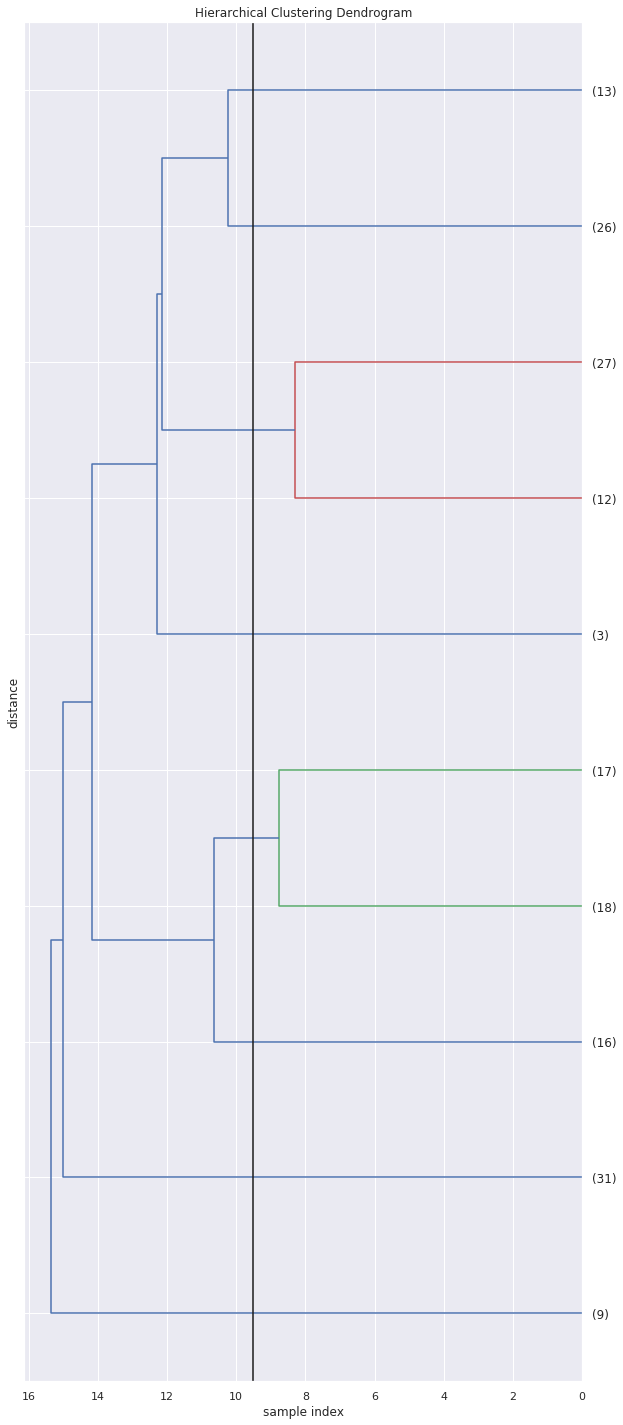

In [36]:
# Affichage du dendrogramme tronqué
plt.figure(figsize=(10,25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axvline(x=9.5, c='k')
dendrogram(
    Z,
    labels = names,
    orientation = "left",
    color_threshold = 9.5,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10
)
plt.show()

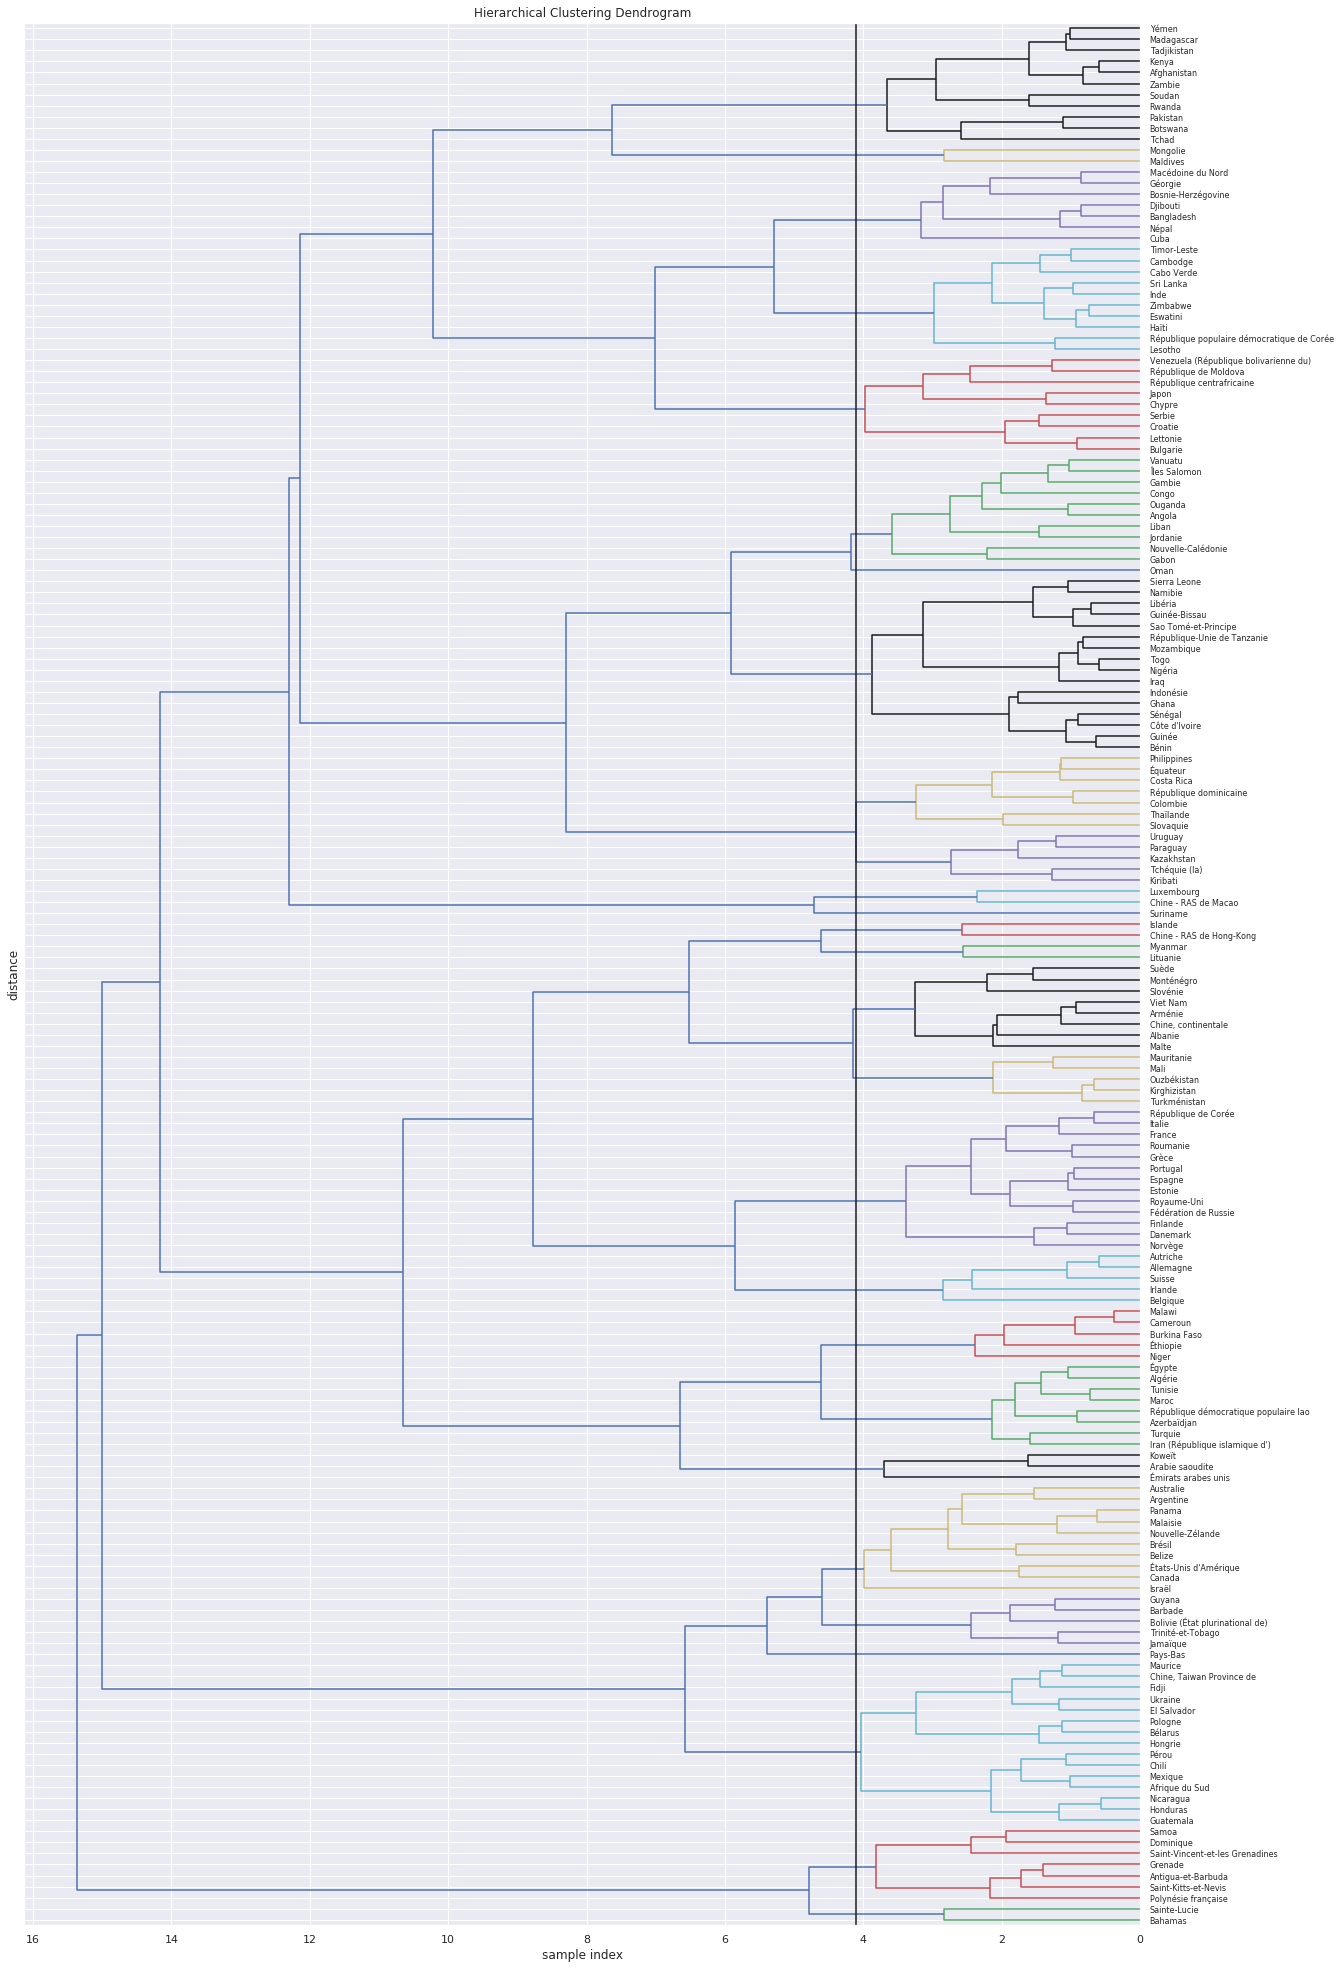

In [37]:
# Affichage du dendrogramme complet
plt.figure(figsize=(20,35))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axvline(x=4.1, c='k')
dendrogram(
    Z,
    labels = names,
    orientation = "left",
    color_threshold = 4.1,
    leaf_font_size = 8
)
plt.show()

In [38]:
df = pd.DataFrame(data=X_projected)
df.columns = ["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]
df['Clusters'] = fcluster(Z, 5, criterion='maxclust')
sns.pairplot(df, hue='Clusters', height=4)

ValueError: Length mismatch: Expected axis has 7 elements, new values have 4 elements

#### Calcul des vecteurs et des valeurs propre

In [ ]:
fig, axes = plt.subplots(figsize = (20, 10))

# choix du nombre de composantes à calculer
n_comp = 2

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df[["Difference de population","Disponibilité alimentaire Kcal"]]

# préparation des données pour l'ACP
X = data_pca.values
names = df.index #pour avoir les intitulés
features = df.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
OCR.display_scree_plot(pca)

plt.show()

In [ ]:
print(("Explained Variance: %s") % (pca.fit(X).explained_variance_ratio_))

In [ ]:
# Cercle des corrélations
pcs = pca.components_
OCR.display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
OCR.display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], df['Clusters'])#, labels = np.array(names))

In [ ]:
covariance_matrix = np.cov(df.T)
print("Covariance matrix:\n", covariance_matrix)

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors:\n", eigen_vectors, "\n")
print("Eigenvalues:\n", eigen_values)

In [ ]:
eigen_vec_svd, _, _= np.linalg.svd(df.T)
eigen_vec_svd

In [ ]:
for val in eigen_values:
    print(val)

In [ ]:
variance_explained = [(i / sum(eigen_values)) * 100 for i in eigen_values]
variance_explained

In [ ]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
sns.lineplot(x = [1,2,3], y = cumulative_variance_explained);
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

In [ ]:
projection_matrix = (eigen_vectors.T[:][:])[:2, :2].T
print("Projection matrix: \n", projection_matrix)

In [ ]:
X_pca = X.dot(projection_matrix)

In [ ]:
for clu in clusters:
    sns.scatterplot(X_pca[df['Clusters']==clusters, 0],
                   X_pca[df['Clusters']==clusters, 1])

In [ ]:
corrmat = np.abs(df[df['Clusters'] == 5].iloc[:,:2].corr())
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmin = 0, vmax=1, square=True, annot = True)

In [ ]:
df.iloc[:,2]

In [ ]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
OCR.plot_dendrogram(Z, names)

In [ ]:
df = pd.DataFrame(data=X_scaled)
df.index = names
df.columns = ["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]

g = sns.clustermap(df, z_score=0, cmap="vlag", figsize=(20, 50))

In [ ]:
df

In [ ]:
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
OCR.plot_dendrogram(Z, names)

In [ ]:
df = pd.DataFrame(data=X_scaled)
df.index = names
df.columns = ["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]

df['clusters'] = fcluster(Z, 2, criterion='maxclust')
clusters = df.pop('clusters')

lut = dict(zip(clusters.unique(), "rbgym"))
row_colors = clusters.map(lut)

g = sns.clustermap(df, z_score=0, cmap="vlag", figsize=(20, 40), row_colors=row_colors)

In [ ]:
lut

### Découpage en 2 clusters

In [ ]:
Z

In [ ]:
clusters = fcluster(Z, 2, criterion='maxclust')

In [ ]:
clusters

In [ ]:
data['Clusters'] = clusters

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot((data['Difference de population'] - data['Difference de population'].mean()) / data.std()['Difference de population'], norm_hist = True, ax=axes[0, 0]))
ax2 = fig.add_subplot(sns.distplot((data['Disponibilité alimentaire Kcal'] - data['Disponibilité alimentaire Kcal'].mean()) / data.std()['Disponibilité alimentaire Kcal'], norm_hist = True, ax=axes[0, 1]))
ax3 = fig.add_subplot(sns.distplot(data['Disponibilité alimentaire Protéine'], norm_hist = True, ax=axes[1, 0]))
ax4 = fig.add_subplot(sns.distplot(data['Proportion Protéine Animale'], norm_hist = True, ax=axes[1, 1]))
                     
ax1.title.set_text('Difference de population')
ax2.title.set_text('Disponibilité alimentaire Kcal')

fig.suptitle("Total", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)

plt.show()

In [ ]:
data.std()['Difference de population']

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))

std = data.std()['Difference de population']
mean = data['Difference de population'].mean()

ax1 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Difference de population'] - mean) / std, ax=axes[0, 0]))
ax1 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Difference de population'] - mean) / std, ax=axes[0, 0]))

std = data.std()['Disponibilité alimentaire Kcal']
mean = data['Disponibilité alimentaire Kcal'].mean()

ax2 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Disponibilité alimentaire Kcal'] - mean) /std, ax=axes[0, 1]))
ax2 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Disponibilité alimentaire Kcal'] - mean) /std, ax=axes[0, 1]))

std = data.std()['Disponibilité alimentaire Protéine']
mean = data['Disponibilité alimentaire Protéine'].mean()

ax3 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Disponibilité alimentaire Protéine'] - mean) /std, ax=axes[1, 0]))
ax3 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Disponibilité alimentaire Protéine'] - mean) /std, ax=axes[1, 0]))

std = data.std()['Proportion Protéine Animale']
mean = data['Proportion Protéine Animale'].mean()

ax4 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 1]['Proportion Protéine Animale'] - mean) /std, ax=axes[1, 1]))
ax4 = fig.add_subplot(sns.distplot((data[data['Clusters'] == 2]['Proportion Protéine Animale'] - mean) /std, ax=axes[1, 1]))
                     
ax1.title.set_text('Difference de population')
ax2.title.set_text('Disponibilité alimentaire Kcal')

fig.suptitle("Cluster 1", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

fig.suptitle('Répartition du prix en fonction de la catégorie du livre', fontsize= _FONTSIZETITLE_)
ax1 = sns.boxplot(x='Clusters', y='Difference de population', meanprops=meanprops, showmeans=True, data=data)

plt.xlabel("Clusters")
plt.ylabel("Difference de population")

sns.despine(left=True, bottom=True)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Difference de population'], ax=axes[0, 0]))
ax2 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Disponibilité alimentaire Kcal'], ax=axes[0, 1]))
ax3 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Disponibilité alimentaire Protéine'], ax=axes[1, 0]))
ax4 = fig.add_subplot(sns.distplot(data[data['Clusters'] == 2]['Proportion Protéine Animale'], ax=axes[1, 1]))
                     
ax1.title.set_text('Difference de population')
ax2.title.set_text('Disponibilité alimentaire Kcal')

fig.suptitle("Cluster 2", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)

plt.show()

In [ ]:
data

### ACP

In [ ]:
fig, axes = plt.subplots(figsize = (20, 10))

# choix du nombre de composantes à calculer
n_comp = 4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["Difference de population","Disponibilité alimentaire Kcal","Disponibilité alimentaire Protéine","Proportion Protéine Animale"]]

# préparation des données pour l'ACP
X = data_pca.values
names = data.index #pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
OCR.display_scree_plot(pca)

plt.show()

In [ ]:
print(("Explained Variance: %s") % (pca.fit(X).explained_variance_ratio_))

In [ ]:
# Cercle des corrélations
pcs = pca.components_
OCR.display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
OCR.display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], clusters)#, labels = np.array(names))

In [ ]:
corrmat = np.abs(data.corr())
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmin = 0, vmax=1, square=True, annot = True)

In [ ]:
sns.pairplot(data, hue='Clusters')

In [ ]:
pcs

In [ ]:
X_projected = np.hstack((X_projected, np.atleast_2d(clusters).T))

In [ ]:
clusters

In [ ]:
meanD1 = []
meanD2 = []

In [ ]:
meanD1.append(X_projected[X_projected[ : , -1] == 2][:, 0].mean())

In [ ]:
meanD1

In [ ]:
for i in range(1,int(data.max().clusters)+1):
    meanD1.append(X_projected[X_projected[ : , -1] == i][:, 0].mean())
    meanD2.append(X_projected[X_projected[ : , -1] == i][:, 1].mean())

In [ ]:
X_projected[X_projected[ : , -1] == i][:, 0].mean()

In [ ]:
meanD1